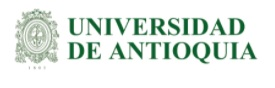
<h1> Sistema de recomendación - Banco Santander kaggle challenge - Monografía-Bosque Aleatorio- prueba por meses </h1>
<h3>Hector David Ardila Soto
<br><br>Universidad de Antioquia
<br>Facultad de Ingeniería </h3>


<Hr>

<p>Se importan las librerías necesarias para ejecutar el código</p>

In [85]:
import numpy as np
import pandas as pd
import dask
import dask.dataframe as dd
from functools import reduce
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, balanced_accuracy_score,precision_recall_curve
from collections import defaultdict
import xgboost as xgb

<h5>Se carga el dataset completo utilzando dask, luego obtenemos los meses deseados para realizar las recomendaciones</h5>

In [49]:
df_raw = dd.read_csv("train_ver2.csv",dtype={'ult_fec_cli_1t':str,'indrel':str,'age':str,'sexo':str,'antiguedad':str,'indrel_1mes':str,'conyuemp':str, 'ind_ahor_fin_ult1': float, 'ind_aval_fin_ult1': float, 'ind_cco_fin_ult1': float,
                                                       'ind_cder_fin_ult1': float, 'ind_cno_fin_ult1': float, 'ind_ctju_fin_ult1': float,
                                                       'ind_ctma_fin_ult1': float, 'ind_ctop_fin_ult1': float, 'ind_ctpp_fin_ult1': float,
                                                       'ind_deco_fin_ult1': float, 'ind_deme_fin_ult1': float, 'ind_dela_fin_ult1': float,
                                                       'ind_ecue_fin_ult1': float, 'ind_fond_fin_ult1': float, 'ind_hip_fin_ult1': float,
                                                       'ind_plan_fin_ult1': float, 'ind_pres_fin_ult1': float, 'ind_reca_fin_ult1': float,
                                                       'ind_tjcr_fin_ult1': float, 'ind_valo_fin_ult1': float, 'ind_viv_fin_ult1': float,
                                                       'ind_nomina_ult1': float, 'ind_nom_pens_ult1': float, 'ind_recibo_ult1': float})

<p>Las columnas <b>fecha_dato</b> y <b>fecha_alta</b> las pasamos a formato datetime </p>

In [50]:
df_raw['fecha_dato'] = dd.to_datetime(df_raw['fecha_dato'],format ='%y%m%d',errors='ignore')

In [51]:
df_raw['fecha_alta'] = dd.to_datetime(df_raw['fecha_alta'],format ='%y%m%d',errors='ignore')

In [52]:
df_raw.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p>Se segmentan por meses y se almacenan en la carpeta del notebook</p>

In [53]:
#Nuevo grupos por meses
df_raw_copy = df_raw.copy()

In [7]:
#datos del mes 2015-06-28
mes_2015_01_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2015-01-28']
mes_2015_01_28.to_csv('mes_2015_01_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2015_01_28_normal.csv']

In [8]:
#datos del mes 2015-07-28
mes_2015_02_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2015-02-28']
mes_2015_02_28.to_csv('mes_2015_02_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2015_02_28_normal.csv']

In [9]:
#datos del mes 2015-02-28
mes_2015_03_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2015-03-28']
mes_2015_03_28.to_csv('mes_2015_03_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2015_03_28_normal.csv']

In [45]:
#datos del mes 2015-02-28
mes_2015_04_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2015-04-28']
mes_2015_04_28.to_csv('mes_2015_04_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2015_04_28_normal.csv']

In [11]:
#datos del mes 2015-06-28
mes_2015_05_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2015-05-28']
mes_2015_05_28.to_csv('mes_2015_05_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2015_05_28_normal.csv']

In [12]:
#datos del mes 2015-07-28
mes_2015_06_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2015-06-28']
mes_2015_06_28.to_csv('mes_2015_06_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2015_06_28_normal.csv']

In [13]:
#datos del mes 2015-02-28
mes_2015_07_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2015-07-28']
mes_2015_07_28.to_csv('mes_2015_07_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2015_07_28_normal.csv']

In [54]:
#datos del mes 2015-02-28
mes_2015_08_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2015-08-28']
mes_2015_08_28.to_csv('mes_2015_08_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2015_08_28_normal.csv']

In [15]:
#datos del mes 2015-06-28
mes_2015_09_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2015-09-28']
mes_2015_09_28.to_csv('mes_2015_09_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2015_09_28_normal.csv']

In [16]:
#datos del mes 2015-07-28
mes_2015_10_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2015-10-28']
mes_2015_10_28.to_csv('mes_2015_10_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2015_10_28_normal.csv']

In [17]:
#datos del mes 2015-02-28
mes_2015_11_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2015-11-28']
mes_2015_11_28.to_csv('mes_2015_11_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2015_11_28_normal.csv']

In [18]:
#datos del mes 2015-02-28
mes_2015_12_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2015-12-28']
mes_2015_12_28.to_csv('mes_2015_12_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2015_12_28_normal.csv']

In [19]:
#datos del mes 2015-02-28
mes_2016_01_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2016-01-28']
mes_2016_01_28.to_csv('mes_2016_01_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2016_01_28_normal.csv']

In [20]:
#datos del mes 2015-02-28
mes_2016_02_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2016-02-28']
mes_2016_02_28.to_csv('mes_2016_02_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2016_02_28_normal.csv']

In [21]:
#datos del mes 2015-02-28
mes_2016_03_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2016-03-28']
mes_2016_03_28.to_csv('mes_2016_03_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2016_03_28_normal.csv']

In [22]:
#datos del mes 2015-02-28
mes_2016_04_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2016-04-28']
mes_2016_04_28.to_csv('mes_2016_04_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2016_04_28_normal.csv']

In [23]:
#datos del mes 2015-02-28
mes_2016_05_28 =  df_raw_copy[df_raw_copy['fecha_dato'] == '2016-05-28']
mes_2016_05_28.to_csv('mes_2016_05_28_normal.csv',single_file = True)

['C:/Users/Hector Ardila/Desktop/Jupyter/Final Banco Santander/mes_2016_05_28_normal.csv']

<p> Se cargan los meses deseados y se eliminan el archivo de dask para liberar espacio de memoria</p>

In [2]:
del df_raw
del df_raw_copy
del mes_2015_01_28 , mes_2015_02_28, mes_2015_03_28,mes_2015_04_28 , mes_2015_06_28, mes_2015_07_28,mes_2015_08_28,mes_2015_09_28, \
    mes_2015_10_28 , mes_2015_11_28, mes_2015_12_28,mes_2016_01_28 , mes_2016_02_28, mes_2016_03_28,mes_2016_04_28, mes_2016_05_28
    

In [5]:
#meses a importar 
#todos
data_frames_normal = list()

moths_address = {'df_mes_01_1':'mes_2015_01_28_normal.csv','df_mes_02_1':'mes_2015_02_28_normal.csv',
                 'df_mes_03_1':'mes_2015_03_28_normal.csv','df_mes_04_1':'mes_2015_04_28_normal.csv',
                 'df_mes_05_1':'mes_2015_05_28_normal.csv','df_mes_06_1':'mes_2015_06_28_normal.csv',
                 'df_mes_07_1':'mes_2015_07_28_normal.csv','df_mes_08_1':'mes_2015_08_28_normal.csv',
                 'df_mes_09_1':'mes_2015_09_28_normal.csv','df_mes_10_1':'mes_2015_10_28_normal.csv',
                 'df_mes_11_1':'mes_2015_11_28_normal.csv','df_mes_12_1':'mes_2015_12_28_normal.csv',
                 'df_mes_13_1':'mes_2016_01_28_normal.csv','df_mes_14_1':'mes_2016_02_28_normal.csv',
                 'df_mes_15_1':'mes_2016_03_28_normal.csv','df_mes_16_1':'mes_2016_04_28_normal.csv',
                 'df_mes_17_1':'mes_2016_05_28_normal.csv',
                 'df_mes_18_1':'test_ver2.csv',}
for month,address in moths_address.items():
    data_frames_normal.append(pd.read_csv(address, dtype={'ult_fec_cli_1t':str,'indrel':str,'age':str,'sexo':str,'antiguedad':str,'indrel_1mes':str,'conyuemp':str, 'ind_ahor_fin_ult1': float, 'ind_aval_fin_ult1': float, 'ind_cco_fin_ult1': float,
                                                       'ind_cder_fin_ult1': float, 'ind_cno_fin_ult1': float, 'ind_ctju_fin_ult1': float,
                                                       'ind_ctma_fin_ult1': float, 'ind_ctop_fin_ult1': float, 'ind_ctpp_fin_ult1': float,
                                                       'ind_deco_fin_ult1': float, 'ind_deme_fin_ult1': float, 'ind_dela_fin_ult1': float,
                                                       'ind_ecue_fin_ult1': float, 'ind_fond_fin_ult1': float, 'ind_hip_fin_ult1': float,
                                                       'ind_plan_fin_ult1': float, 'ind_pres_fin_ult1': float, 'ind_reca_fin_ult1': float,
                                                       'ind_tjcr_fin_ult1': float, 'ind_valo_fin_ult1': float, 'ind_viv_fin_ult1': float,
                                                       'ind_nomina_ult1': float, 'ind_nom_pens_ult1': float, 'ind_recibo_ult1': float}))
    
    

<p>Ejecución de prueba para corroborar la carga de los datos</p>

In [6]:
data_frames_normal[5]['nomprov']

0             MADRID
1           VALENCIA
2               JAEN
3              CADIZ
4         PONTEVEDRA
             ...    
632105    PONTEVEDRA
632106       GRANADA
632107        MADRID
632108        MADRID
632109    PONTEVEDRA
Name: nomprov, Length: 632110, dtype: object

<p>Se crea una lista con los productos presentes en el dataset, se utilizará e partes del código</p>

In [7]:
products = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
               'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
               'ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1',
               'ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']

<p>Se convierten en valores númericos las características antiguedad, age, indrel, renta, ind_nuevo</p>

In [8]:
for i  in range(0,len(data_frames_normal)):  
    data_frames_normal[i].antiguedad = pd.to_numeric(data_frames_normal[i].antiguedad,errors="coerce")
    data_frames_normal[i].age  = pd.to_numeric(data_frames_normal[i].age, errors="coerce")
    data_frames_normal[i].indrel  = pd.to_numeric(data_frames_normal[i].indrel, errors="coerce")
    data_frames_normal[i].renta  = pd.to_numeric(data_frames_normal[i].renta, errors="coerce")
    data_frames_normal[i].ind_nuevo = pd.to_numeric(data_frames_normal[i].ind_nuevo,errors="coerce")

<p>Se obtiene una vista previa de los datos, observa valores nulos</p>

In [9]:
#datos nulos
data_frames_normal[0].isnull().any()

Unnamed: 0               False
fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                       True
fecha_alta                True
ind_nuevo                 True
antiguedad                True
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop

<hr>

<h4>Limpieza de datos</h4>

<p>En la característica edad se encontraron, datos atípicos. Se procede a enviarlos al centro de la distribución</p>

C:\Users\Hector Ardila\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Hector Ardila\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


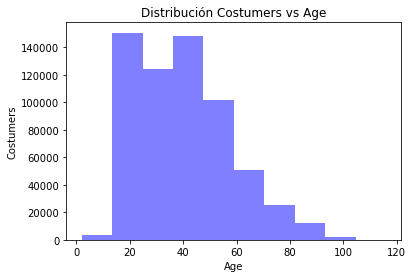

In [10]:
x = data_frames_normal[0]["age"]
n,bins, patches = plt.hist(x,10,facecolor='blue', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Costumers')
plt.title(r'Distribución Costumers vs Age')

plt.savefig('Costumers_vs_age.jpg', bbox_inches='tight')

In [11]:
def fillage(df_users_age):
    filter_under_18 = df_users_age['age']<=18
    filter_over_100 = df_users_age['age']>=100
    #Se le asigna valor medio de los datos mas cercanos
    closest_under_18 = df_users_age.loc[(df_users_age['age']>=18) & (df_users_age['age']<=40),"age"].mean(skipna=True)
    closest_over_100 = df_users_age.loc[(df_users_age['age'] >= 40) & (df_users_age['age']<= 100),"age"].mean(skipna=True)
    df_users_age.loc[filter_under_18, 'age'] = closest_under_18
    df_users_age.loc[filter_over_100, 'age'] = closest_over_100
    df_users_age["age"].fillna(df_users_age["age"].median(),inplace=True)
    df_users_age["age"]                  = df_users_age["age"].astype(int)
    

<p>Correción por meses de este característica</p>

In [12]:
for i  in range(0,len(data_frames_normal)):   
    fillage(data_frames_normal[i])

<p>Vizualización luego del ajuste de datos</p>

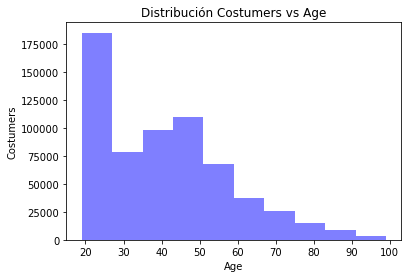

In [13]:
x = data_frames_normal[2]["age"]
n,bins, patches = plt.hist(x,10,facecolor='blue', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Costumers')
plt.title(r'Distribución Costumers vs Age')

plt.savefig('Costumers_vs_age.jpg', bbox_inches='tight')

<p>Se buscan datos nulos en las características ind_nuevo, antiguedad, fecha_Alta, para esto de cargan solo esas caracteristicas</p>

In [14]:
#Second  cleaning the data by antiguedad
df_users_fecha_alta = pd.read_csv("train_ver2.csv",usecols=['fecha_dato', 'ncodpers', 'ind_nuevo','fecha_alta','antiguedad'])
print(df_users_fecha_alta.shape)
df_users_fecha_alta.head()

C:\Users\Hector Ardila\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(13647309, 5)


,fecha_dato,ncodpers,fecha_alta,ind_nuevo,antiguedad
0,2015-01-28,1375586,2015-01-12,0.0,6
1,2015-01-28,1050611,2012-08-10,0.0,35
2,2015-01-28,1050612,2012-08-10,0.0,35
3,2015-01-28,1050613,2012-08-10,0.0,35
4,2015-01-28,1050614,2012-08-10,0.0,35


In [15]:
df_users_fecha_alta['antiguedad'] = pd.to_numeric(df_users_fecha_alta['antiguedad'],errors="coerce")
df_users_fecha_alta['ind_nuevo'] = pd.to_numeric(df_users_fecha_alta['ind_nuevo'],errors="coerce")

In [16]:
#ind_nuevo shows that a user whether is new costumer in a year or not.
months_active = df_users_fecha_alta.loc[df_users_fecha_alta["ind_nuevo"].isnull(),:]
months_active_1 = df_users_fecha_alta.loc[df_users_fecha_alta["antiguedad"].isnull(),:]
months_active_2 = df_users_fecha_alta.loc[df_users_fecha_alta["fecha_alta"].isnull(),:]
print(f"{months_active['fecha_dato'].value_counts()}")
print(f"{months_active_1['fecha_dato'].value_counts()}")
print(f"{months_active_2['fecha_dato'].value_counts()}")

2015-01-28    6953
2015-02-28    5940
2015-03-28    5091
2015-04-28    4292
2015-05-28    3597
2015-06-28    1861
Name: fecha_dato, dtype: int64
2015-01-28    6953
2015-02-28    5940
2015-03-28    5091
2015-04-28    4292
2015-05-28    3597
2015-06-28    1861
Name: fecha_dato, dtype: int64
2015-01-28    6953
2015-02-28    5940
2015-03-28    5091
2015-04-28    4292
2015-05-28    3597
2015-06-28    1861
Name: fecha_dato, dtype: int64


In [17]:
del df_users_fecha_alta

<p>Los valores nulos en estas características van disminuyendo con el pasar de los meses, los valores nulos restantes aparecen en el mes 6, por esto, se tomarán como nuevos usuarios.</p>

In [18]:
for i  in range(0,len(data_frames_normal)):
    ind_nuevo_null = data_frames_normal[i]['ind_nuevo'].isnull()
    data_frames_normal[i].loc[ind_nuevo_null, 'ind_nuevo']=1
data_frames_normal[1].isnull().any()

Unnamed: 0               False
fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta                True
ind_nuevo                False
antiguedad                True
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop

<p>Los valores nulos en antiguedad son los mismos que en ind_nuevo, por lo cual, la antiguedad asignada a datos nulos será cero, además, se coloca el condicional de agregar cero si se encuentras valores menores a cero en antiguedad.</p>

In [19]:
for i  in range(0,len(data_frames_normal)):
    filter_outliers = data_frames_normal[i].antiguedad<0
    filter_null = data_frames_normal[i].antiguedad.isnull() 
    data_frames_normal[i].loc[filter_outliers,'antiguedad']=0
    data_frames_normal[i].loc[filter_null,'antiguedad']=0
data_frames_normal[1].isnull().any()

Unnamed: 0               False
fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta                True
ind_nuevo                False
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop

<p>A la característica indrel se le asigna 1 por defecto al ser el valor más común. Igualmente a la característica ind_actividad_cliente se le adiciona cero por ser lo mas común</p>

In [20]:
print('indrel conteo de datos')
print(data_frames_normal[0].indrel.value_counts())

indrel conteo de datos
1.0     617741
99.0       763
Name: indrel, dtype: int64


In [21]:
for i  in range(0,len(data_frames_normal)):
    data_frames_normal[i].loc[data_frames_normal[i].indrel.isnull(), 'indrel']=1

In [22]:
for i  in range(0,len(data_frames_normal)):
    data_frames_normal[i].loc[data_frames_normal[i]['ind_actividad_cliente'].isnull(),'ind_actividad_cliente']=0

<p>A la característica nomprov se le adiciona un valor temporal 'Default' el cual se cambia por Madrid, los datos relacionados con 'Default' tienen una media de ingresos casí como la media de ingresos en madrid.</p>

In [23]:
for i  in range(0,len(data_frames_normal)):
    data_frames_normal[i].loc[data_frames_normal[i].nomprov.isnull(),"nomprov"] = "Default"

<p>Aunque esta característica no se utilizará en el entrenamiento del modelo,se le adiciona un valor unos días anteriores a fecha_dato</p>

In [24]:
##fecha alta tend to be a date before fecha_dato, the NAN value will be fill in this way
for i  in range(0,len(data_frames_normal)):
    data_frames_normal[i].loc[((data_frames_normal[i].fecha_dato=='2015-01-28') & (data_frames_normal[i].fecha_alta.isnull())),'fecha_alta']='2015-01-25'

    
    data_frames_normal[i].loc[((data_frames_normal[i].fecha_dato=='2015-02-28') & (data_frames_normal[i].fecha_alta.isnull())),'fecha_alta']='2015-02-25'

   
    data_frames_normal[i].loc[((data_frames_normal[i].fecha_dato=='2015-03-28') & (data_frames_normal[i].fecha_alta.isnull())),'fecha_alta']='2015-03-25'

    
    data_frames_normal[i].loc[((data_frames_normal[i].fecha_dato=='2015-04-28') & (data_frames_normal[i].fecha_alta.isnull())),'fecha_alta']='2015-04-25'

    
    data_frames_normal[i].loc[((data_frames_normal[i].fecha_dato=='2015-05-28') & (data_frames_normal[i].fecha_alta.isnull())),'fecha_alta']='2015-05-25'

    
    data_frames_normal[i].loc[((data_frames_normal[i].fecha_dato=='2015-06-28') & (data_frames_normal[i].fecha_alta.isnull())),'fecha_alta']='2015-06-25'

data_frames_normal[2].isnull().any()

Unnamed: 0               False
fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                  False
ind_actividad_cliente    False
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop

<p>Los valores promedio de la característica income se obtuvieron previamente</p>

In [25]:

media_income_dict = \
{'ALAVA'                   :   96967.65,
'ALBACETE'                 :  78657.30,
'ALICANTE'                 :  67526.28,
'ALMERIA'                  :  73390.65,
'ASTURIAS'                 :  87199.38,
'AVILA'                     : 68561.28,
'BADAJOZ'                  :  62330.97,
'BALEARS, ILLES'          :  123573.51,
'BARCELONA'               :  131214.48,
'BIZKAIA'                 :   99978.78,
'BURGOS'                   :  89385.09,
'CACERES'                  :  67799.49,
'CADIZ'                  :    79016.37,
'CANTABRIA'               :   95517.60,
'CASTELLON'               :   66630.30,
'CEUTA'                  :   128699.58,
'CIUDAD REAL'            :    62193.45,
'CORDOBA'               :     69106.89,
'CORUÑA, A'               :   97689.30,
'CUENCA'                  :   67201.41,
'GIPUZKOA'                :   80599.14,
'GIRONA'                  :  108963.21,
'GRANADA'                 :   82447.02,
'GUADALAJARA'             :   92724.66,
'HUELVA'                  :   68994.30,
'HUESCA'                  :   73467.81,
'JAEN'                    :   67886.40,
'LEON'                    :   80901.54,
'LERIDA'                :     64818.45,
'LUGO'                      : 64390.53,
'MADRID'                   : 139070.97,
'MALAGA'                    : 95102.61,
'MELILLA'                   :117408.66,
'MURCIA'                    : 67813.86,
'NAVARRA'                   : 86649.27,
'OURENSE'                   : 79069.62,
'PALENCIA'                   :86593.08,
'PALMAS, LAS'                :80948.61,
'PONTEVEDRA'                 :97829.10,
'RIOJA, LA'                  :89936.28,
'SALAMANCA'                  :89831.25,
'SANTA CRUZ DE TENERIFE'     :82729.23,
'SEGOVIA'                    :89311.56,
'SEVILLA'                    :92710.35,
'SORIA'                      :78810.90,
'TARRAGONA'                  :88283.46,
'TERUEL'                     :76467.57,
'TOLEDO'                     :68867.76,
'Default'                   :137860.11,
'VALENCIA'                  : 72988.98,
'VALLADOLID'                : 92880.39,
'ZAMORA'                    : 74692.71,
'ZARAGOZA'                  : 99950.28}
for i in range(0, len(data_frames_normal)):
      for prov,incom in media_income_dict.items():
                data_frames_normal[i].loc[((data_frames_normal[i]['nomprov']==prov) & (data_frames_normal[i]['renta'].isnull())), 'renta'] = incom


<p>Se grafíca el top 23 de ingresos por nomprov</p>

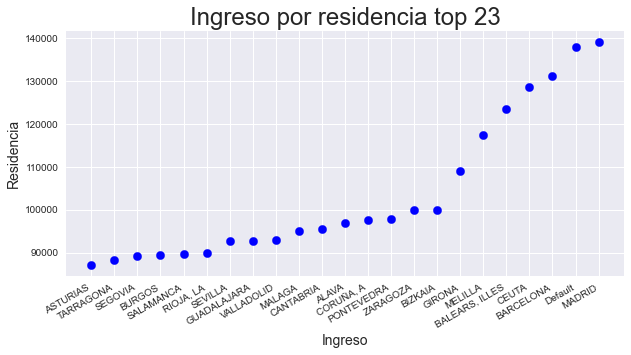

In [26]:
import pandas as pd
import numpy as np
x=[]
y=[]
media_income_dict = {prov: income for prov, income in sorted(media_income_dict.items(), key=lambda item: item[1])}
for prov,income in media_income_dict.items():
    x.append(prov), y.append(income)
import matplotlib.pyplot as plt

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 5))
fig.autofmt_xdate()
ax.set_title('Ingreso por residencia top 23', fontsize=24)
ax.set_xlabel('Ingreso', fontsize = 14)
ax.set_ylabel('Residencia', fontsize = 14)
ax.scatter(x[30:],y[30:],c='blue', s=70)

<p>Observando la gráfica se decide asignar MADRID a los datos nulos en la característica nomprov</p> 

In [27]:
for i in range(0, len(data_frames_normal)):
    data_frames_normal[i].loc[data_frames_normal[i]['nomprov']=='Default', 'nomprov']='MADRID'

<p>Solamente los productos ind_nomina_ult1, ind_nom_pens_ult1 presentan valores nulos, se decide adicionar cero en estos valores nulos, cero es el valor más común </p>

In [28]:
for i in range(0, len(data_frames_normal[:16])):
    data_frames_normal[i].loc[data_frames_normal[i].ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
    data_frames_normal[i].loc[data_frames_normal[i].ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

<p> A las siguientes características se les adiciona el valor más común : tiprel_1mes, indfall, sexo, canal_entrada </p>

In [29]:
for i in range(0, len(data_frames_normal)):
    data_frames_normal[i]["indfall"] = data_frames_normal[i]["indfall"].fillna("N")
    data_frames_normal[i]["tiprel_1mes"] = data_frames_normal[i]["tiprel_1mes"].fillna("A")

In [30]:
for i in range(0, len(data_frames_normal)):
    data_frames_normal[i]['sexo'] = data_frames_normal[i]["sexo"].fillna("V")

In [31]:
for i in range(0, len(data_frames_normal)):
    data_frames_normal[i]['canal_entrada'] = data_frames_normal[i]["canal_entrada"].fillna("KHE")

In [32]:
for i in range(0, len(data_frames_normal)):
    data_frames_normal[i]['segmento'] = data_frames_normal[i]["segmento"].fillna("02 - PARTICULARES")    

In [33]:
for i in range(0, len(data_frames_normal)):
    data_frames_normal[i]['pais_residencia'] = data_frames_normal[i]["pais_residencia"].fillna("ES")    

In [34]:
for i in range(0, len(data_frames_normal)):
    data_frames_normal[i]['ind_empleado'] = data_frames_normal[i]["ind_empleado"].fillna("N")
    data_frames_normal[i]['indresi'] = data_frames_normal[i]["indresi"].fillna("N")   
    data_frames_normal[i]['indext'] = data_frames_normal[i]["indext"].fillna("N")   

In [35]:
for i in range(0, len(data_frames_normal)):
        data_frames_normal[i].loc[data_frames_normal[i]['indrel']==99.0, 'indrel'] = 99
        data_frames_normal[i].loc[data_frames_normal[i]['indrel']==1.0, 'indrel'] = 1

<p> A las siguientes características se les adiciona un valor por defecto(Default), estas no seran utilizadas para realizar las recomendaciones : ult_fec_cli_1t, conyuemp</p>

In [63]:
for i in range(0, len(data_frames_normal)):

        data_frames_normal[i].loc[data_frames_normal[i]['ult_fec_cli_1t'].isnull(), 'ult_fec_cli_1t'] = "Default"
        data_frames_normal[i].loc[data_frames_normal[i]['conyuemp'].isnull(), 'conyuemp'] = "Default"


In [79]:
for i in range(0, len(data_frames_normal)):
    data_frames_normal[i].loc[data_frames_normal[i]['indrel_1mes'].isnull(), 'indrel_1mes'] = '1'


<h3>Codificación</h3>
<p>Se crean dictionarios para realizar la codificación en ciertas características</p>

In [37]:
##Create a Dictinary
ind_empleado_dict = {
    'N':0,
    'A':1,
    'F':2,
    'B':3,
    'S':4  
}

sexo_dict = {
    'V':0,
    'H':1
}


indrel_1mes_dict = {
    '1.0':1, 
    '1':1, 
    '2.0':2, 
    '2':2,
    '3.0':3, 
    '3':3, 
    '4.0':4, 
    '4':4,
    'P':5
}


tiprel_1mes_dict = {
     'A':0, 
     'I':1,
     'P':2,
     'R':3, 
     'N':4
}

indresi_dict = {
     'N':0,
     'S':1
}


indext_dict = {
     'N':0, 
     'S':1
}


indfall_dict = {
     'N':0,
     'S':1
}

indrel_dict = {
      1:1,
      99:99,
      1.0:1,
      99.0:99
}



segmento_dict = {
    '02 - PARTICULARES':0,
    '03 - UNIVERSITARIO':1,
    '01 - TOP':2,
}     

canal_entrada_dict ={
 'KHE': 0,
 'KAT': 1,
 'KFC': 2,
 'KHQ': 3,
 'KFA': 4,
 'KHK': 5,
 'KHM': 6,
 'KHD': 7,
 'KHN': 8,
 'KAS': 9,
 'RED': 10,
 'KAG': 11,
 'KAY': 12,
 'KAA': 13,
 'KAB': 14,
 'KAE': 15,
 'KCC': 16,
 'KBZ': 17,
 'KHL': 18,
 'KFD': 19,
 'KAI': 20,
 'KEY': 21,
 'KAW': 22,
 'KAR': 23,
 'KAZ': 24,
 'KAF': 25,
 '007': 26,
 '013': 27,
 'KCI': 28,
 'KAH': 29,
 'KAJ': 30,
 'KCH': 31,
 'KHF': 32,
 'KAQ': 33,
 'KHC': 34,
 'KAP': 35,
 'KAM': 36,
 'KAD': 37,
 'KFP': 38,
 'KGX': 39,
 'KEJ': 40,
 'KHO': 41,
 'KGV': 42,
 'KDR': 43,
 'KFT': 44,
 'KAC': 45,
 'KAL': 46,
 'KBO': 47,
 'KBH': 48,
 'KFG': 49,
 'KFS': 50,
 'KAO': 51,
 'KFJ': 52,
 'KES': 53,
 'KEW': 54,
 'KFF': 55,
 'KCG': 56,
 'KCB': 57,
 'KEN': 58,
 'KFU': 59,
 'KFN': 60,
 'KCL': 61,
 'KBQ': 62,
 'KGY': 63,
 'KFK': 64,
 'KFL': 65,
 'KBF': 66,
 'KCD': 67,
 'KCM': 68,
 'KBU': 69,
 'KED': 70,
 'KDU': 71,
 'KFH': 72,
 'KEL': 73,
 'KDM': 74,
 'KEZ': 75,
 'KDY': 76,
 'KDS': 77,
 'KEG': 78,
 'KBR': 79,
 'KDO': 80,
 'KDX': 81,
 'KBG': 82,
 'KEH': 83,
 'KDC': 84,
 'KCA': 85,
 'KAN': 86,
 'KDT': 87,
 'KBB': 88,
 'KBW': 89,
 'KCN': 90,
 'KDQ': 91,
 'KCU': 92,
 'KDP': 93,
 'KGW': 94,
 'KCK': 95,
 'KEI': 96,
 'KBV': 97,
 'KFI': 98,
 'KEA': 99,
 'KEO': 100,
 'KEV': 101,
 'KAK': 102,
 'KDE': 103,
 'KDW': 104,
 'KDF': 105,
 'KBS': 106,
 'KHP': 107,
 'KBY': 108,
 'KBL': 109,
 'KBM': 110,
 'KEK': 111,
 'KDD': 112,
 'KDZ': 113,
 'KBJ': 114,
 'KDG': 115,
 'KDV': 116,
 'KCF': 117,
 'KDA': 118,
 'KFM': 119,
 'KFR': 120,
 'KEB': 121,
 'KEF': 122,
 'KCE': 123,
 'KEU': 124,
 'KFE': 125,
 'KAU': 126,
 'KBD': 127,
 'KCS': 128,
 'KEC': 129,
 'KCV': 130,
 'KCJ': 131,
 '004': 132,
 'KCQ': 133,
 'KDN': 134,
 'KCR': 135,
 'KDH': 136,
 'KCO': 137,
 'KEE': 138,
 'KCP': 139,
 'K00': 140,
 'KBE': 141,
 'KEQ': 142,
 'KFB': 143,
 'KAV': 144,
 'KCT': 145,
 'KBX': 146,
 'KBP': 147,
 'KEM': 148,
 'KFV': 149,
 'KCX': 150,
 'KBN': 151,
 'KHA': 152,
 'KGU': 153,
 'KGC': 154,
 'KGN': 155,
 'KDB': 156,
 'KDI': 157,
 'KDL': 158,
 '025': 159,
 'KHS': 160,
 'KHR': 161}

nomprov_dict ={
 'MADRID':1,
 'BARCELONA':3,
 'VALENCIA':4,
 'SEVILLA':5,
 'CORUÑA, A':6,
 'MURCIA':7,
 'MALAGA':8,
 'ZARAGOZA':9,
 'ALICANTE':10,
 'CADIZ':11,
 'PONTEVEDRA':12,
 'ASTURIAS':13,
 'VALLADOLID':14,
 'PALMAS, LAS':15,
 'BADAJOZ':16,
 'BIZKAIA':17,
 'TOLEDO':18,
 'GRANADA':19,
 'SALAMANCA':20,
 'CANTABRIA':21,
 'CORDOBA':22,
 'CACERES':23,
 'BALEARS, ILLES':24,
 'HUELVA':25,
 'CIUDAD REAL':26,
 'ALBACETE':27,
 'CASTELLON':28,
 'TARRAGONA':29,
 'BURGOS':30,
 'GIRONA':31,
 'NAVARRA':32,
 'RIOJA, LA':33,
 'LUGO':34,
 'OURENSE':35,
 'LEON':36,
 'LERIDA':37,
 'GIPUZKOA':38,
 'SANTA CRUZ DE TENERIFE':39,
 'GUADALAJARA':40,
 'JAEN':41,
 'ALMERIA':42,
 'CUENCA':43,
 'ZAMORA':44,
 'PALENCIA':45,
 'SEGOVIA':46,
 'HUESCA':47,
 'AVILA':48,
 'ALAVA':49,
 'TERUEL':50,
 'SORIA':51,
 'MELILLA':52,
 'CEUTA':53
}

pais_residencia_dict = {
'ES': 0,
 'FR': 1,
 'AR': 2,
 'DE': 3,
 'GB': 4,
 'US': 5,
 'CO': 6,
 'IT': 7,
 'RO': 8,
 'MX': 9,
 'BR': 10,
 'VE': 11,
 'EC': 12,
 'CH': 13,
 'BE': 14,
 'BO': 15,
 'PY': 16,
 'PT': 17,
 'CL': 18,
 'PE': 19,
 'RU': 20,
 'CU': 21,
 'NL': 22,
 'SE': 23,
 'PL': 24,
 'CN': 25,
 'UY': 26,
 'UA': 27,
 'AT': 28,
 'BG': 29,
 'CA': 30,
 'AU': 31,
 'DO': 32,
 'IL': 33,
 'IE': 34,
 'MA': 35,
 'FI': 36,
 'HN': 37,
 'GR': 38,
 'JP': 39,
 'DK': 40,
 'AE': 41,
 'NG': 42,
 'IN': 43,
 'CR': 44,
 'NO': 45,
 'GT': 46,
 'LU': 47,
 'GQ': 48,
 'ZA': 49,
 'SG': 50,
 'AD': 51,
 'BY': 52,
 'CZ': 53,
 'TH': 54,
 'SV': 55,
 'PR': 56,
 'KR': 57,
 'MD': 58,
 'DZ': 59,
 'SK': 60,
 'PK': 61,
 'CM': 62,
 'SA': 63,
 'PA': 64,
 'KE': 65,
 'HR': 66,
 'SN': 67,
 'EG': 68,
 'AO': 69,
 'TR': 70,
 'NI': 71,
 'QA': 72,
 'CI': 73,
 'GN': 74,
 'HK': 75,
 'MR': 76,
 'NZ': 77,
 'GA': 78,
 'MK': 79,
 'EE': 80,
 'LT': 81,
 'HU': 82,
 'ET': 83,
 'GW': 84,
 'MZ': 85,
 'BA': 86,
 'TW': 87,
 'VN': 88,
 'RS': 89,
 'PH': 90,
 'CG': 91,
 'OM': 92,
 'KW': 93,
 'MM': 94,
 'SL': 95,
 'CD': 96,
 'KZ': 97,
 'AL': 98,
 'TN': 99,
 'LY': 100,
 'TG': 101,
 'LB': 102,
 'GM': 103,
 'GI': 104,
 'BZ': 105,
 'IS': 106,
 'LV': 107,
 'KH': 108,
 'CF': 109,
 'GE': 110,
 'ML': 111,
 'GH': 112,
 'ZW': 113,
 'DJ': 114,
 'JM': 115,
 'BM': 116,
 'MT': 117}



<P>Se copia los dataframes para hacer el cambio de variables categóricas a numéricas </P>

In [38]:
data_frames_labeled = [] 
for data in data_frames_normal:
    data_frames_labeled.append(data.copy())

<hr>

<p>Se realiza la codificación</p>

In [39]:
for i in range(0, len(data_frames_labeled)):
    data_frames_labeled[i]['ind_empleado'] = data_frames_labeled[i].ind_empleado.map(ind_empleado_dict)
    data_frames_labeled[i]['sexo'] = data_frames_labeled[i].sexo.map(sexo_dict)
    data_frames_labeled[i]['pais_residencia'] = data_frames_labeled[i].pais_residencia.map(pais_residencia_dict)
    data_frames_labeled[i]['tiprel_1mes'] = data_frames_labeled[i].tiprel_1mes.map(tiprel_1mes_dict)
    data_frames_labeled[i]['indresi'] = data_frames_labeled[i].indresi.map(indresi_dict)
    data_frames_labeled[i]['indext'] = data_frames_labeled[i].indext.map(indext_dict)
    data_frames_labeled[i]['indfall'] = data_frames_labeled[i].indfall.map(indfall_dict)
    data_frames_labeled[i]['nomprov'] = data_frames_labeled[i].nomprov.map(nomprov_dict)
    data_frames_labeled[i]['segmento'] = data_frames_labeled[i].segmento.map(segmento_dict)
    data_frames_labeled[i]['indrel_1mes'] = data_frames_labeled[i].indrel_1mes.map(indrel_1mes_dict)
    data_frames_labeled[i]['indrel'] = data_frames_labeled[i].indrel.map(indrel_dict)
    data_frames_labeled[i]['canal_entrada'] = data_frames_labeled[i].canal_entrada.map(canal_entrada_dict)

<p>Se realiza una busqueda de datos nulos para corroborar que en este punto del dataset no se poseen.</p>

In [40]:
data_frames_labeled[3].isnull().any()

Unnamed: 0               False
fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t           False
indrel_1mes               True
tiprel_1mes              False
indresi                  False
indext                   False
conyuemp                 False
canal_entrada            False
indfall                  False
tipodom                   True
cod_prov                  True
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop

<p>Ahora se realiza la codificación One Hot a ciertas caracteriscas:</p>
<il>sexo, indresi, indext, indrel</il>

In [41]:
for i in range(0,len(data_frames_labeled)):
    data_frames_labeled[i] = pd.get_dummies(data_frames_labeled[i], columns=['sexo', 'indresi', 'indext','indrel'])

In [42]:
 data_frames_labeled[5].columns

Index(['Unnamed: 0', 'fecha_dato', 'ncodpers', 'ind_empleado',
       'pais_residencia', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'conyuemp',
       'canal_entrada', 'indfall', 'tipodom', 'cod_prov', 'nomprov',
       'ind_actividad_cliente', 'renta', 'segmento', 'ind_ahor_fin_ult1',
       'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
       'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
       'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1',
       'ind_nom_pens_ult1', 'ind_recibo_ult1', 'sexo_0', 'sexo_1', 'indresi_0',
       'indresi_1', 'indext_0', 'indext_1', 'indrel_1', 'indrel_99'],
      dtype='object

<hr>  

<h3>Se crean los conjuntos de entramiento y validación.</h3>

<h5>Entrenamiento</h5>
<p>Se toman los 4 primeros meses del mes 2015 las características demográficas</p>   

In [86]:
mes_reference_to_train = data_frames_labeled[3].copy()

mes_reference_to_train 

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,age,fecha_alta,ind_nuevo,antiguedad,ult_fec_cli_1t,...,ind_nom_pens_ult1,ind_recibo_ult1,sexo_0,sexo_1,indresi_0,indresi_1,indext_0,indext_1,indrel_1,indrel_99
0,357816,2015-04-28,15889,2,0,56,1995-01-16,0.0,245.0,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
1,357817,2015-04-28,1394803,0,0,24,2015-04-29,1.0,3.0,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
2,357818,2015-04-28,545148,0,0,42,2005-08-02,0.0,120.0,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
3,357819,2015-04-28,545146,0,0,51,2005-08-02,0.0,120.0,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
4,357820,2015-04-28,545142,0,0,52,2005-08-02,0.0,120.0,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630362,227340,2015-04-28,1059300,0,0,22,2012-09-13,0.0,34.0,Default,...,0.0,1.0,0,1,0,1,1,0,1,0
630363,227341,2015-04-28,1059303,0,0,23,2012-09-13,0.0,34.0,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
630364,227342,2015-04-28,1059301,0,0,25,2012-09-13,0.0,34.0,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
630365,227343,2015-04-28,1059292,0,0,25,2012-09-13,0.0,34.0,Default,...,0.0,1.0,1,0,0,1,1,0,1,0


<p>Se concatenan los 4 primeros meses, eliminando usuarios repetidos</p>

In [87]:
data_lags = [mes_reference_to_train,data_frames_labeled[2],\
             data_frames_labeled[1],data_frames_labeled[0]]
mes_to_train_with_lag = pd.concat(data_lags,ignore_index=True, sort =False)
# mes_to_train_with_lag_lag1 = mes_to_train_with_lag_lag1.fillna(0)
mes_to_train_with_lag = mes_to_train_with_lag.drop_duplicates(['ncodpers'],keep='last')
mes_to_train_with_lag.shape


(637324, 53)

In [88]:
mes_to_train_with_lag = mes_to_train_with_lag.fillna(0)
for i in mes_to_train_with_lag.columns:
    print(i)

Unnamed: 0
fecha_dato
ncodpers
ind_empleado
pais_residencia
age
fecha_alta
ind_nuevo
antiguedad
ult_fec_cli_1t
indrel_1mes
tiprel_1mes
conyuemp
canal_entrada
indfall
tipodom
cod_prov
nomprov
ind_actividad_cliente
renta
segmento
ind_ahor_fin_ult1
ind_aval_fin_ult1
ind_cco_fin_ult1
ind_cder_fin_ult1
ind_cno_fin_ult1
ind_ctju_fin_ult1
ind_ctma_fin_ult1
ind_ctop_fin_ult1
ind_ctpp_fin_ult1
ind_deco_fin_ult1
ind_deme_fin_ult1
ind_dela_fin_ult1
ind_ecue_fin_ult1
ind_fond_fin_ult1
ind_hip_fin_ult1
ind_plan_fin_ult1
ind_pres_fin_ult1
ind_reca_fin_ult1
ind_tjcr_fin_ult1
ind_valo_fin_ult1
ind_viv_fin_ult1
ind_nomina_ult1
ind_nom_pens_ult1
ind_recibo_ult1
sexo_0
sexo_1
indresi_0
indresi_1
indext_0
indext_1
indrel_1
indrel_99


<h5>Validación</h5>
<p>Se toman del mes 2016-05-28 </p>   

In [48]:
mes_reference_to_all_fin = data_frames_labeled[16].copy()
mes_reference_to_all_fin.head()

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,age,fecha_alta,ind_nuevo,antiguedad,ult_fec_cli_1t,...,ind_nom_pens_ult1,ind_recibo_ult1,sexo_0,sexo_1,indresi_0,indresi_1,indext_0,indext_1,indrel_1,indrel_99
0,144351,2016-05-28,657640,0,0,68,2006-11-17,0.0,114,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
1,144352,2016-05-28,657788,0,0,42,2006-11-18,0.0,114,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
2,144353,2016-05-28,657795,0,0,44,2006-11-18,0.0,114,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
3,144354,2016-05-28,657790,0,0,42,2006-11-18,0.0,114,Default,...,1.0,1.0,1,0,0,1,1,0,1,0
4,144355,2016-05-28,657794,0,0,49,2006-11-18,0.0,114,Default,...,0.0,0.0,0,1,0,1,1,0,1,0


In [49]:
mes_to_all_with_lag = mes_reference_to_all_fin
mes_to_all_with_lag.shape

(931453, 53)

In [50]:
mes_to_all_with_lag = mes_to_all_with_lag.fillna(0)
mes_to_all_with_lag

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,age,fecha_alta,ind_nuevo,antiguedad,ult_fec_cli_1t,...,ind_nom_pens_ult1,ind_recibo_ult1,sexo_0,sexo_1,indresi_0,indresi_1,indext_0,indext_1,indrel_1,indrel_99
0,144351,2016-05-28,657640,0,0,68,2006-11-17,0.0,114,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
1,144352,2016-05-28,657788,0,0,42,2006-11-18,0.0,114,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
2,144353,2016-05-28,657795,0,0,44,2006-11-18,0.0,114,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
3,144354,2016-05-28,657790,0,0,42,2006-11-18,0.0,114,Default,...,1.0,1.0,1,0,0,1,1,0,1,0
4,144355,2016-05-28,657794,0,0,49,2006-11-18,0.0,114,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931448,314691,2016-05-28,1166765,0,0,22,2013-08-14,0.0,33,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
931449,314692,2016-05-28,1166764,0,0,23,2013-08-14,0.0,33,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
931450,314693,2016-05-28,1166763,0,0,47,2013-08-14,0.0,33,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
931451,314694,2016-05-28,1166789,0,0,22,2013-08-14,0.0,33,Default,...,0.0,0.0,0,1,0,1,1,0,1,0


<p>Vista de las columnas del conjunto utilzado para validación</p>

In [51]:
for i in mes_to_all_with_lag.columns:
    print( ','+'"'+str(i)+'"')

,"Unnamed: 0"
,"fecha_dato"
,"ncodpers"
,"ind_empleado"
,"pais_residencia"
,"age"
,"fecha_alta"
,"ind_nuevo"
,"antiguedad"
,"ult_fec_cli_1t"
,"indrel_1mes"
,"tiprel_1mes"
,"conyuemp"
,"canal_entrada"
,"indfall"
,"tipodom"
,"cod_prov"
,"nomprov"
,"ind_actividad_cliente"
,"renta"
,"segmento"
,"ind_ahor_fin_ult1"
,"ind_aval_fin_ult1"
,"ind_cco_fin_ult1"
,"ind_cder_fin_ult1"
,"ind_cno_fin_ult1"
,"ind_ctju_fin_ult1"
,"ind_ctma_fin_ult1"
,"ind_ctop_fin_ult1"
,"ind_ctpp_fin_ult1"
,"ind_deco_fin_ult1"
,"ind_deme_fin_ult1"
,"ind_dela_fin_ult1"
,"ind_ecue_fin_ult1"
,"ind_fond_fin_ult1"
,"ind_hip_fin_ult1"
,"ind_plan_fin_ult1"
,"ind_pres_fin_ult1"
,"ind_reca_fin_ult1"
,"ind_tjcr_fin_ult1"
,"ind_valo_fin_ult1"
,"ind_viv_fin_ult1"
,"ind_nomina_ult1"
,"ind_nom_pens_ult1"
,"ind_recibo_ult1"
,"sexo_0"
,"sexo_1"
,"indresi_0"
,"indresi_1"
,"indext_0"
,"indext_1"
,"indrel_1"
,"indrel_99"


 <hr>

<h3>Entrenamiento y validación</h3>

In [90]:
train = mes_to_train_with_lag.copy()
test = mes_to_all_with_lag.copy()
train.shape , test.shape

((637324, 53), (931453, 53))

<p>Se crea la lista estados la cual nos ayudará determina usuarios que realizaron cambios en sus productos</p>

In [232]:
estados = ["ind_ahor_fin_ult1estado"
,"ind_aval_fin_ult1estado"
,"ind_cco_fin_ult1estado"
,"ind_cder_fin_ult1estado"
,"ind_cno_fin_ult1estado"
,"ind_ctju_fin_ult1estado"
,"ind_ctma_fin_ult1estado"
,"ind_ctop_fin_ult1estado"
,"ind_ctpp_fin_ult1estado"
,"ind_deco_fin_ult1estado"
,"ind_deme_fin_ult1estado"
,"ind_dela_fin_ult1estado"
,"ind_ecue_fin_ult1estado"
,"ind_fond_fin_ult1estado"
,"ind_hip_fin_ult1estado"
,"ind_plan_fin_ult1estado"
,"ind_pres_fin_ult1estado"
,"ind_reca_fin_ult1estado"
,"ind_tjcr_fin_ult1estado"
,"ind_valo_fin_ult1estado"
,"ind_viv_fin_ult1estado"
,"ind_nomina_ult1estado"
,"ind_nom_pens_ult1estado"
,"ind_recibo_ult1estado"]

<p>Se eliminan las columnas 'Unnamed: 0' que crearon al particionar los datos por meses con dask</p>

In [91]:
train_1 = train.drop(columns='Unnamed: 0', axis=1)
test_1 = test.drop(columns='Unnamed: 0', axis=1)

<p>Se eliminan las siguientes columnas de los paquetes de entrenamiento y validación</p>

In [92]:
columns_to_drop = ['fecha_dato','ncodpers','fecha_alta', 'ult_fec_cli_1t','conyuemp',
                    'indfall','pais_residencia', 'tipodom','cod_prov']

In [93]:
Xtrain = train_1.drop(columns=columns_to_drop , axis=1)
Xtrain = Xtrain.drop(columns=products , axis=1)
Xtest = test_1.drop(columns=columns_to_drop , axis=1)
Xtest = Xtest.drop(columns=products, axis=1)
Xtrain.shape, Xtest.shape

((637324, 19), (931453, 19))

In [94]:
for i in Xtrain.columns:
    print(i)

ind_empleado
age
ind_nuevo
antiguedad
indrel_1mes
tiprel_1mes
canal_entrada
nomprov
ind_actividad_cliente
renta
segmento
sexo_0
sexo_1
indresi_0
indresi_1
indext_0
indext_1
indrel_1
indrel_99


<p>Se cargan los datos sample_submission.csv los cuales son una guía que ofrece kaggle de el formato que se debe subir a su página.</p>

In [174]:
sample = pd.read_csv("sample_submission.csv")

<p>df_to_ytrain_1 no permite obtener la y_entrenamineto, los productos</p>

In [95]:
df_to_ytrain_1 =train
df_to_ytrain_1.shape

(637324, 53)

In [96]:
df_to_ytrain_1.shape ,Xtrain.shape

((637324, 53), (637324, 19))

<p>Se igualan el nombre de las columnas por cuestiones de librerias</p>

In [97]:
Xtrain.columns = Xtest.columns
Xtest.shape

(931453, 19)

0.5
ind_ahor_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0
0.5
ind_aval_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0


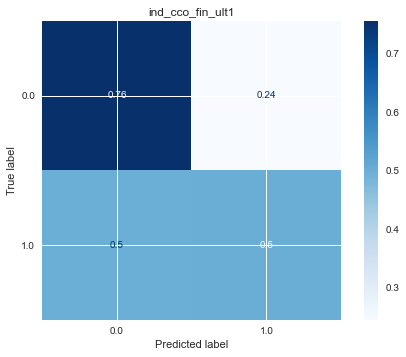

0.6686002803032107
ind_cco_fin_ult1
0.6686002803032107
Precision : 0.7571980814083302
recall : 0.5011867560517437
Accuracy  : 0.6023438649078375
Balanced_accuracy : 0.6285710331072858


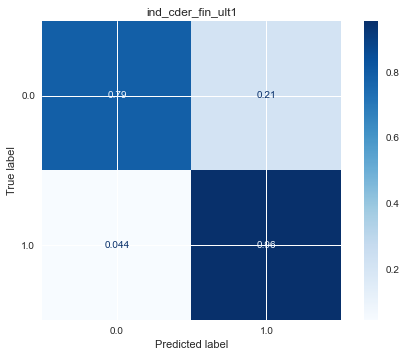

0.9210704021133927
ind_cder_fin_ult1
0.9210704021133927
Precision : 0.001550101115867492
recall : 0.9556962025316456
Accuracy  : 0.7911456616705298
Balanced_accuracy : 0.8733930103393532


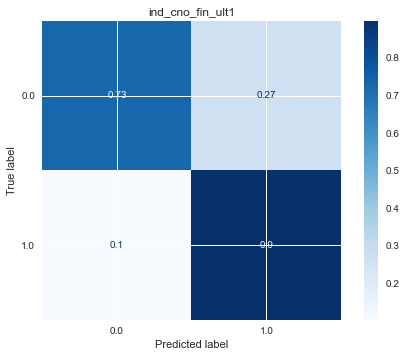

0.8739938089575899
ind_cno_fin_ult1
0.8739938089575899
Precision : 0.22109485606418122
recall : 0.8977429818918438
Accuracy  : 0.7439044160038134
Balanced_accuracy : 0.8142768069320914


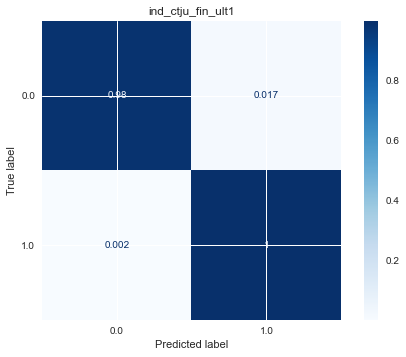

0.9978877373040531
ind_ctju_fin_ult1
0.9978877373040531
Precision : 0.3273765739258362
recall : 0.998021369212505
Accuracy  : 0.9832949166517259
Balanced_accuracy : 0.9905977226374949


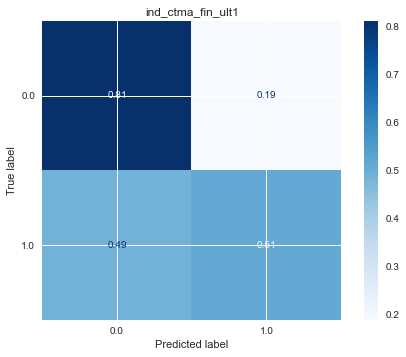

0.7841293948506004
ind_ctma_fin_ult1
0.7841293948506004
Precision : 0.023228641390028736
recall : 0.5131530196369025
Accuracy  : 0.8081910735163235
Balanced_accuracy : 0.6619656555000735


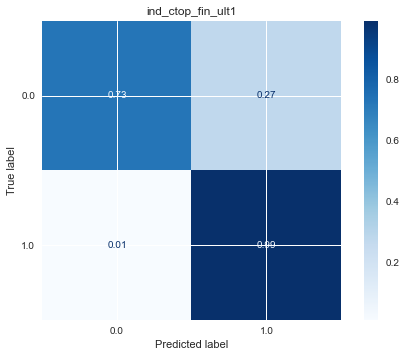

0.8998660248334157
ind_ctop_fin_ult1
0.8998660248334157
Precision : 0.30568120054168085
recall : 0.989631072980147
Accuracy  : 0.7561336964935429
Balanced_accuracy : 0.8587481415854923


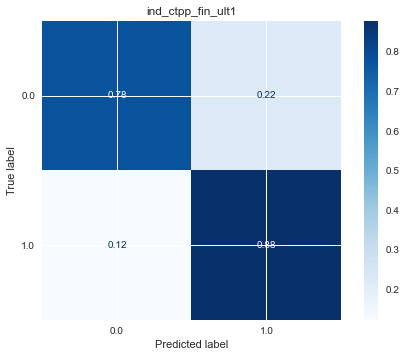

0.8891445528559758
ind_ctpp_fin_ult1
0.8891445528559758
Precision : 0.1265270733081892
recall : 0.8772204021520242
Accuracy  : 0.7793028741117373
Balanced_accuracy : 0.8264480780319075
0.5
ind_deco_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0
0.5
ind_deme_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0


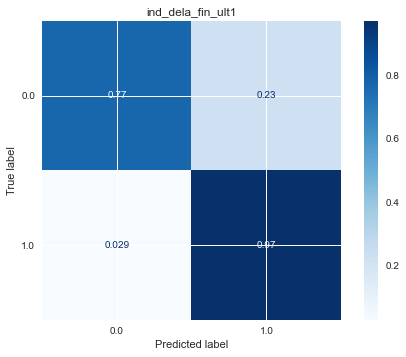

0.9387415917495227
ind_dela_fin_ult1
0.9387415917495227
Precision : 0.1289958951017717
recall : 0.9714258256719095
Accuracy  : 0.7792137660193268
Balanced_accuracy : 0.8719871786951294


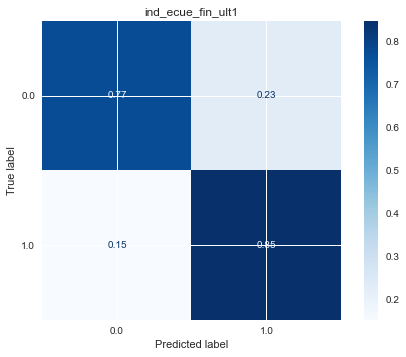

0.8746422726968321
ind_ecue_fin_ult1
0.8746422726968321
Precision : 0.24606688215199374
recall : 0.8471487902959984
Accuracy  : 0.7762023419324432
Balanced_accuracy : 0.8085310575447977


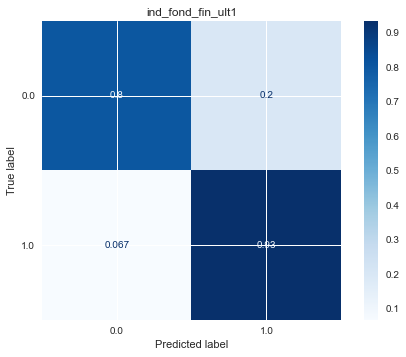

0.9328525789625578
ind_fond_fin_ult1
0.9328525789625578
Precision : 0.07031815359032657
recall : 0.9328657996867978
Accuracy  : 0.8044689318731058
Balanced_accuracy : 0.8676388782501026


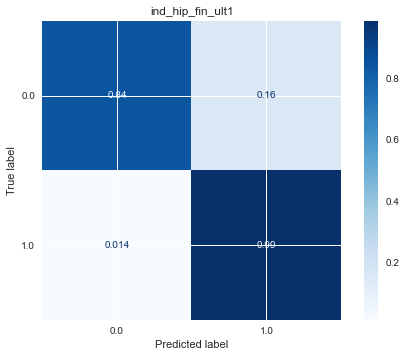

0.9473636940352667
ind_hip_fin_ult1
0.9473636940352667
Precision : 0.030038818361017485
recall : 0.9860865724381626
Accuracy  : 0.8451462392627432
Balanced_accuracy : 0.915272161262909


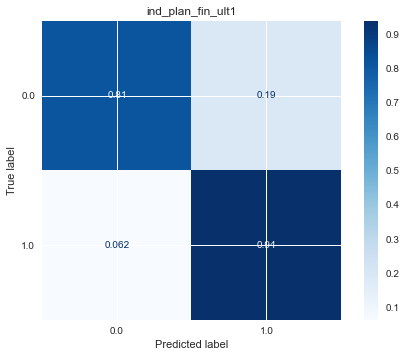

0.9363309787924591
ind_plan_fin_ult1
0.9363309787924591
Precision : 0.03811696345720472
recall : 0.9377632830547629
Accuracy  : 0.8125455605382129
Balanced_accuracy : 0.8746558376589437


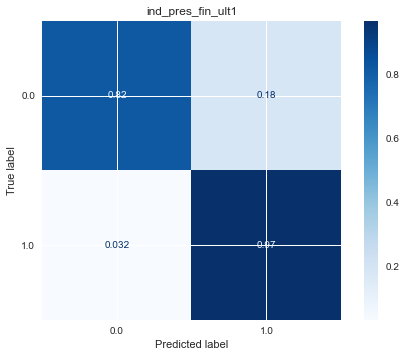

0.9576974721239369
ind_pres_fin_ult1
0.9576974721239369
Precision : 0.011398724667857608
recall : 0.9678553490708187
Accuracy  : 0.8205051677325641
Balanced_accuracy : 0.8940224390335814


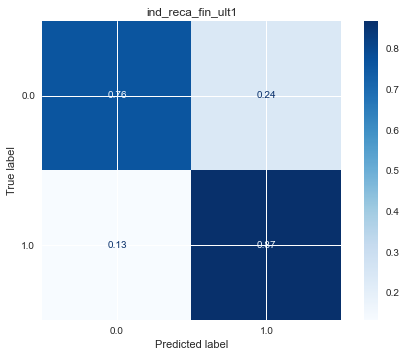

0.8667905788824357
ind_reca_fin_ult1
0.8667905788824357
Precision : 0.15805522208883555
recall : 0.8674206654222028
Accuracy  : 0.7676329347803915
Balanced_accuracy : 0.81496232217288


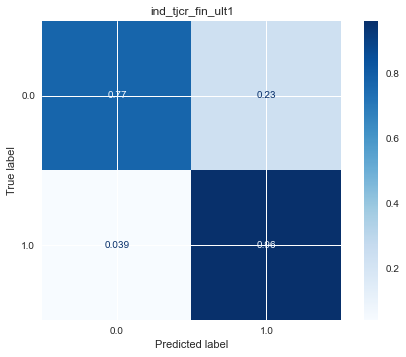

0.9104647221234241
ind_tjcr_fin_ult1
0.9104647221234241
Precision : 0.13995081226681835
recall : 0.9608867957038654
Accuracy  : 0.7777815949919105
Balanced_accuracy : 0.8657786137880312


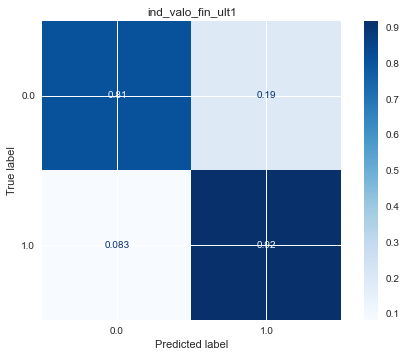

0.92342350636716
ind_valo_fin_ult1
0.92342350636716
Precision : 0.10167728984727453
recall : 0.917250070008401
Accuracy  : 0.8116834665839285
Balanced_accuracy : 0.8632240194299373


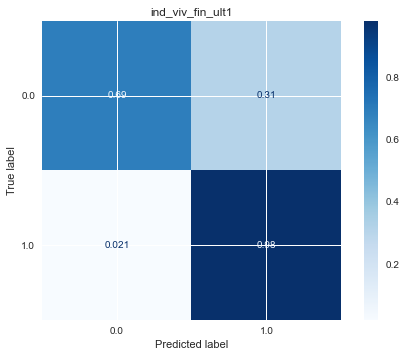

0.9113288605130244
ind_viv_fin_ult1
0.9113288605130244
Precision : 0.00987978514792395
recall : 0.9790469753295032
Accuracy  : 0.6882397716256214
Balanced_accuracy : 0.8331799894838263


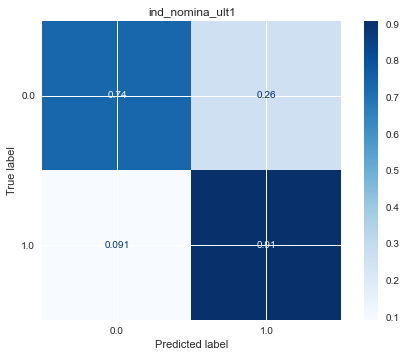

0.8857468502320236
ind_nomina_ult1
0.8857468502320236
Precision : 0.15909939498076917
recall : 0.9085056614709475
Accuracy  : 0.7462137112661615
Balanced_accuracy : 0.8229209075157043


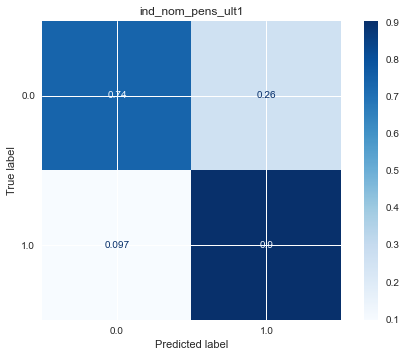

0.8760673208811254
ind_nom_pens_ult1
0.8760673208811254
Precision : 0.17249608579786446
recall : 0.9026831668180442
Accuracy  : 0.748784962848367
Balanced_accuracy : 0.821105584296793


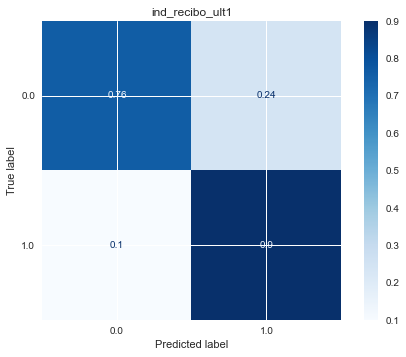

0.8921943323548671
ind_recibo_ult1
0.8921943323548671
Precision : 0.34287985931198983
recall : 0.9002742149491375
Accuracy  : 0.7784912389567696
Balanced_accuracy : 0.8309714885802099


In [102]:
models = {}
model_preds = {}
prediccion_indices = defaultdict(list)
indices = test['ncodpers'].to_numpy()

for product in products:
    
    #Productos con muy baja cantidad de usuarios
    if((product=='ind_ahor_fin_ult1') or (product=='ind_aval_fin_ult1') or (product=='ind_deco_fin_ult1') or (product=='ind_deme_fin_ult1')):
      
       
        ytest = test[product]
        p_train1 = ytest.copy()
        p_train2 = ytest.copy()
        p_train1.loc[:]=0.00001
        
            
            

                             
    else:
        
        #Entrenamiento y predicción para el resto de productos
        ytest = test[product]
    
        ytrain = df_to_ytrain_1[product].values

        clf_model = RandomForestClassifier(max_depth=4, random_state=0, class_weight='balanced', n_jobs=-1)
        clf_model.fit(Xtrain, ytrain)
                
        p_train1 = clf_model.predict_proba(Xtest)[:,1]
        p_train2 = clf_model.predict(Xtest)
        
        disp=plot_confusion_matrix(clf_model, Xtest, ytest,cmap=plt.cm.Blues,
                                 normalize='true')
        disp.ax_.set_title(product)
        plt.grid(False)
        plt.show()  




    for id, p in zip(indices, p_train1):
         prediccion_indices[id].append(p)
        
    print(roc_auc_score(ytest, p_train1))
    print(product)    
    print(roc_auc_score(ytest, p_train1))
    print(f'Precision : {precision_score(ytest,p_train2)}')
    print(f'recall : {recall_score(ytest, p_train2)}')
    print(f'Accuracy  : {accuracy_score(ytest, p_train2)}')
    print(f'Balanced_accuracy : {balanced_accuracy_score(ytest, p_train2)}')   

    


In [180]:
products_cod= ['ncodpers','ind_ahor_fin_ult1','ind_aval_fin_ult1',
 'ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
 'ind_ecue_fin_ult1','ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1',
 'ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
 'ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']

<p>Función para seleccionar los 7 productos que mas se relacionan a cada usuario, evitando seleccionar los que el usuario posee</p>

In [181]:
def product_to_recommend(rec, lista_actual):
    
    lista = lista_actual
    lista_sample = list()
    for i in rec:
        lista_sample.append((lambda x: x[0])(i))
        
    for _,value in enumerate(lista):
        if value in lista_sample:
            lista_sample.remove(value)  
    
    return ' '.join(lista_sample[:7])

<p>Función para organizar los productos</p>

In [182]:
def Sort(sub_li):
    
    return(sorted(sub_li, key = lambda x: x[1],reverse=True)) 

In [184]:
from itertools import islice

producto = {}

for row in data_frames_normal[16][products_cod].values:
    row = list(row)
    id = row.pop(0)   
    producto[id] = [producto for producto, estado in zip(tuple(products), row) if estado > 0]
print('1')

prediciones_ncodpers = dict()
lista_recomendaciones = []

for ncodpers, predictions in islice(prediccion_indices.items(), 0, len(prediccion_indices)):
    
    predicciones_sorted = Sort(list(zip(tuple(products), predictions)))
    prediciones_ncodpers[ncodpers] = predicciones_sorted
print('2')
for ncodpers_sample in sample['ncodpers']:
    
     lista_recomendaciones.append(product_to_recommend(prediciones_ncodpers[ncodpers_sample],producto[ncodpers_sample]))
    



1
2


<p>Adicion de las recomendaciones al formato de sample </p>

In [185]:
sample['added_products'] = lista_recomendaciones

<p>Se guardan los datos .csv para subirlos a kaggle</p>

In [186]:
sample.to_csv('XGBosst_results_forest_4meses.csv', index=False)

<h3>Se crean los conjuntos de entramiento y validación.</h3>

<h5>Entrenamiento</h5>
<p>Se toma desde el cuarto mes hasta el octavo mese del mes 2015 las características demográficas</p>   

In [103]:
mes_reference_to_train = data_frames_labeled[7].copy()

mes_reference_to_train 

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,age,fecha_alta,ind_nuevo,antiguedad,ult_fec_cli_1t,...,ind_nom_pens_ult1,ind_recibo_ult1,sexo_0,sexo_1,indresi_0,indresi_1,indext_0,indext_1,indrel_1,indrel_99
0,42394,2015-08-28,753621,0,0,37,2008-03-11,0.0,89,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
1,42395,2015-08-28,890628,0,0,48,2010-09-03,0.0,59,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
2,42396,2015-08-28,890627,0,0,37,2010-09-03,0.0,59,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
3,42397,2015-08-28,890626,0,0,34,2010-09-03,0.0,59,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
4,42398,2015-08-28,890625,0,0,30,2010-09-03,0.0,59,Default,...,0.0,1.0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843196,122700,2015-08-28,279157,0,0,49,2002-10-23,0.0,110,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
843197,122701,2015-08-28,279156,0,0,41,2001-10-05,0.0,166,Default,...,0.0,1.0,0,1,0,1,1,0,1,0
843198,122702,2015-08-28,279152,0,0,55,2001-10-05,0.0,166,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
843199,122703,2015-08-28,279183,0,0,43,2001-10-05,0.0,166,Default,...,0.0,0.0,0,1,0,1,1,0,1,0


<p>Se realiza un concat del mes cuarto al octavo del año 2015</p>

In [104]:
data_lags = [mes_reference_to_train,data_frames_labeled[6],\
             data_frames_labeled[5],data_frames_labeled[4],\
            data_frames_labeled[3]]
mes_to_train_with_lag =  pd.concat(data_lags,ignore_index=True, sort =False)

# mes_to_train_with_lag_lag1 = mes_to_train_with_lag_lag1.fillna(0)
mes_to_train_with_lag = mes_to_train_with_lag.drop_duplicates(['ncodpers'],keep='last')

# mes_to_train_with_lag_lag1 = mes_to_train_with_lag_lag1.fillna(0)
mes_to_train_with_lag.shape

(849008, 53)

In [105]:
mes_to_train_with_lag = mes_to_train_with_lag.fillna(0)
mes_to_train_with_lag

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,age,fecha_alta,ind_nuevo,antiguedad,ult_fec_cli_1t,...,ind_nom_pens_ult1,ind_recibo_ult1,sexo_0,sexo_1,indresi_0,indresi_1,indext_0,indext_1,indrel_1,indrel_99
2332,44726,2015-08-28,892379,0,4,38,2015-08-04,1.0,0.0,Default,...,0.0,0.0,0,1,1,0,1,0,1,0
2860,45254,2015-08-28,886862,0,0,39,2010-07-26,1.0,0.0,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
5039,47433,2015-08-28,887737,0,0,41,2010-08-04,1.0,0.0,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
9139,51533,2015-08-28,897350,0,0,29,2010-11-19,1.0,0.0,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
11441,53835,2015-08-28,875189,0,0,39,2015-08-03,0.0,64.0,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567447,227340,2015-04-28,1059300,0,0,22,2012-09-13,0.0,34.0,Default,...,0.0,1.0,0,1,0,1,1,0,1,0
3567448,227341,2015-04-28,1059303,0,0,23,2012-09-13,0.0,34.0,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
3567449,227342,2015-04-28,1059301,0,0,25,2012-09-13,0.0,34.0,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
3567450,227343,2015-04-28,1059292,0,0,25,2012-09-13,0.0,34.0,Default,...,0.0,1.0,1,0,0,1,1,0,1,0


In [106]:

for i in mes_to_train_with_lag.columns:
    print(i)

Unnamed: 0
fecha_dato
ncodpers
ind_empleado
pais_residencia
age
fecha_alta
ind_nuevo
antiguedad
ult_fec_cli_1t
indrel_1mes
tiprel_1mes
conyuemp
canal_entrada
indfall
tipodom
cod_prov
nomprov
ind_actividad_cliente
renta
segmento
ind_ahor_fin_ult1
ind_aval_fin_ult1
ind_cco_fin_ult1
ind_cder_fin_ult1
ind_cno_fin_ult1
ind_ctju_fin_ult1
ind_ctma_fin_ult1
ind_ctop_fin_ult1
ind_ctpp_fin_ult1
ind_deco_fin_ult1
ind_deme_fin_ult1
ind_dela_fin_ult1
ind_ecue_fin_ult1
ind_fond_fin_ult1
ind_hip_fin_ult1
ind_plan_fin_ult1
ind_pres_fin_ult1
ind_reca_fin_ult1
ind_tjcr_fin_ult1
ind_valo_fin_ult1
ind_viv_fin_ult1
ind_nomina_ult1
ind_nom_pens_ult1
ind_recibo_ult1
sexo_0
sexo_1
indresi_0
indresi_1
indext_0
indext_1
indrel_1
indrel_99


 <hr>

<h3>Entrenamiento y validación</h3>

In [107]:
train = mes_to_train_with_lag.copy()
test = mes_to_all_with_lag.copy()
train.shape , test.shape

((849008, 53), (931453, 53))

<p>Se crea la lista estados la cual nos ayudará determina usuarios que realizaron cambios en sus productos</p>

In [54]:
estados = ["ind_ahor_fin_ult1estado"
,"ind_aval_fin_ult1estado"
,"ind_cco_fin_ult1estado"
,"ind_cder_fin_ult1estado"
,"ind_cno_fin_ult1estado"
,"ind_ctju_fin_ult1estado"
,"ind_ctma_fin_ult1estado"
,"ind_ctop_fin_ult1estado"
,"ind_ctpp_fin_ult1estado"
,"ind_deco_fin_ult1estado"
,"ind_deme_fin_ult1estado"
,"ind_dela_fin_ult1estado"
,"ind_ecue_fin_ult1estado"
,"ind_fond_fin_ult1estado"
,"ind_hip_fin_ult1estado"
,"ind_plan_fin_ult1estado"
,"ind_pres_fin_ult1estado"
,"ind_reca_fin_ult1estado"
,"ind_tjcr_fin_ult1estado"
,"ind_valo_fin_ult1estado"
,"ind_viv_fin_ult1estado"
,"ind_nomina_ult1estado"
,"ind_nom_pens_ult1estado"
,"ind_recibo_ult1estado"]

<p>Se eliminan las columnas 'Unnamed: 0' que crearon al particionar los datos por meses con dask</p>

In [108]:
train_1 = train.drop(columns='Unnamed: 0', axis=1)
test_1 = test.drop(columns='Unnamed: 0', axis=1)

<p>Se eliminan las siguientes columnas de los paquetes de entrenamiento y validación</p>

In [109]:
columns_to_drop = ['fecha_dato','ncodpers','fecha_alta', 'ult_fec_cli_1t','conyuemp',
                    'indfall','pais_residencia', 'tipodom','cod_prov']

In [110]:
Xtrain = train_1.drop(columns=columns_to_drop , axis=1)
Xtrain = Xtrain.drop(columns=products , axis=1)
Xtest = test_1.drop(columns=columns_to_drop , axis=1)
Xtest = Xtest.drop(columns=products , axis=1)
Xtrain.shape, Xtest.shape

((849008, 19), (931453, 19))

In [111]:
for i in Xtrain.columns:
    print(i)

ind_empleado
age
ind_nuevo
antiguedad
indrel_1mes
tiprel_1mes
canal_entrada
nomprov
ind_actividad_cliente
renta
segmento
sexo_0
sexo_1
indresi_0
indresi_1
indext_0
indext_1
indrel_1
indrel_99


<p>df_to_ytrain_1 no permite obtener la y_entrenamineto, los productos</p>

In [112]:
df_to_ytrain_1 =train_1


In [113]:
df_to_ytrain_1.shape ,Xtrain.shape

((849008, 52), (849008, 19))

<p>Se igualan el nombre de las columnas por cuestiones de libreria</p>

In [114]:
Xtrain.columns = Xtest.columns
Xtest.shape

(931453, 19)

0.5
ind_ahor_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0
0.5
ind_aval_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0


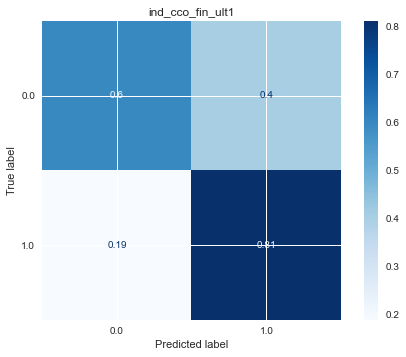

0.7552003992458045
ind_cco_fin_ult1
0.7552003992458045
Precision : 0.7540471174992016
recall : 0.8113832429689378
Accuracy  : 0.7267022598026953
Balanced_accuracy : 0.7047468835181161


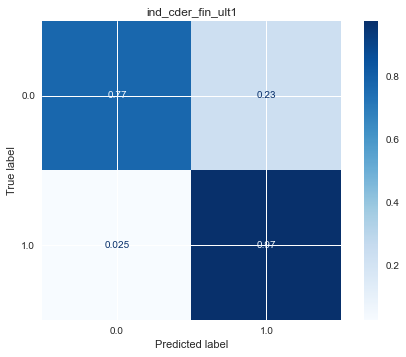

0.9218211006298914
ind_cder_fin_ult1
0.9218211006298914
Precision : 0.0014474636489242713
recall : 0.9746835443037974
Accuracy  : 0.771876841880374
Balanced_accuracy : 0.8732457798328308


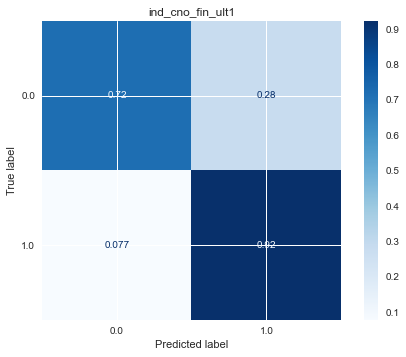

0.8746331374375625
ind_cno_fin_ult1
0.8746331374375625
Precision : 0.21860567692387525
recall : 0.9225715498008513
Accuracy  : 0.7352641518144233
Balanced_accuracy : 0.8209466291488343


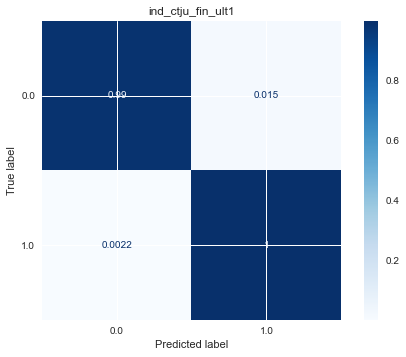

0.9981730926095612
ind_ctju_fin_ult1
0.9981730926095612
Precision : 0.35691030057094325
recall : 0.9977575517741722
Accuracy  : 0.9853497707345406
Balanced_accuracy : 0.9915027541005184


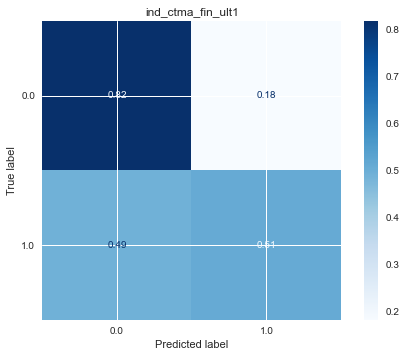

0.798925869928726
ind_ctma_fin_ult1
0.798925869928726
Precision : 0.024020699059451523
recall : 0.5090774360874398
Accuracy  : 0.8159273736839111
Balanced_accuracy : 0.6638478035968544


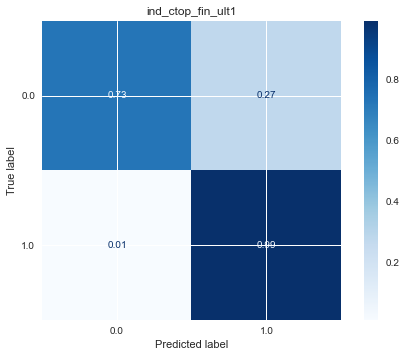

0.9081316432413474
ind_ctop_fin_ult1
0.9081316432413474
Precision : 0.3054900071498053
recall : 0.9897106045392637
Accuracy  : 0.7559039479179304
Balanced_accuracy : 0.8586543114937648


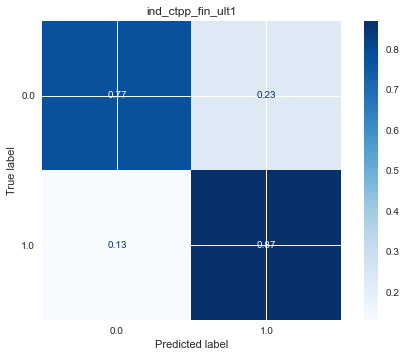

0.8875133816616159
ind_ctpp_fin_ult1
0.8875133816616159
Precision : 0.12487700885536242
recall : 0.8697364070812419
Accuracy  : 0.7776366601428092
Balanced_accuracy : 0.821980726392337
0.5
ind_deco_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0
0.5
ind_deme_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0


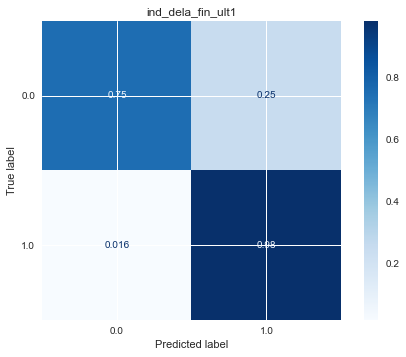

0.9394095167674008
ind_dela_fin_ult1
0.9394095167674008
Precision : 0.12186062753719232
recall : 0.9837268155171861
Accuracy  : 0.7618774108838556
Balanced_accuracy : 0.8689556369073941


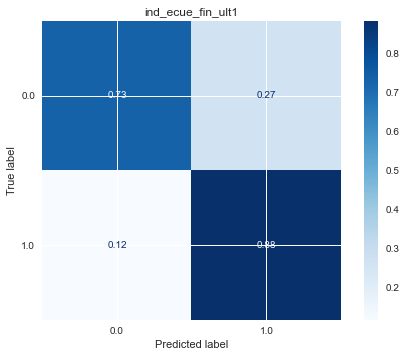

0.8755360889444512
ind_ecue_fin_ult1
0.8755360889444512
Precision : 0.22771846458713602
recall : 0.883314654888259
Accuracy  : 0.7465722908187531
Balanced_accuracy : 0.8088827390812343


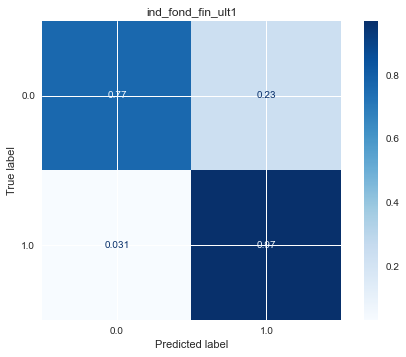

0.9335810317999224
ind_fond_fin_ult1
0.9335810317999224
Precision : 0.06212568315552374
recall : 0.969020221965003
Accuracy  : 0.7688482403298932
Balanced_accuracy : 0.8673308089577755


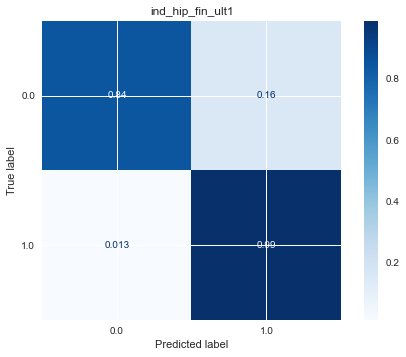

0.9473924315036867
ind_hip_fin_ult1
0.9473924315036867
Precision : 0.02965958209668745
recall : 0.9865282685512368
Accuracy  : 0.8430377056061873
Balanced_accuracy : 0.9144325135943334


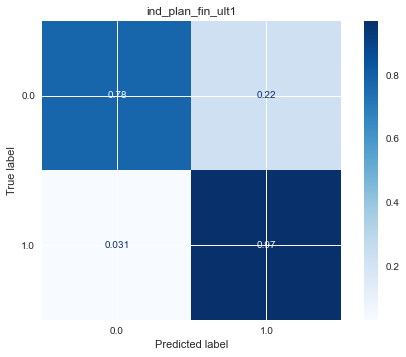

0.9363674336653519
ind_plan_fin_ult1
0.9363674336653519
Precision : 0.03341342438421223
recall : 0.9694251936404403
Accuracy  : 0.7781981484841425
Balanced_accuracy : 0.8730502551103941


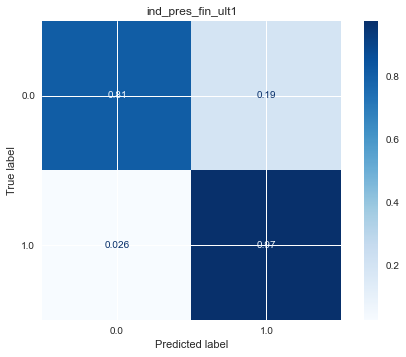

0.9588014202684835
ind_pres_fin_ult1
0.9588014202684835
Precision : 0.010837609130643773
recall : 0.9738824711200402
Accuracy  : 0.8099453219861872
Balanced_accuracy : 0.8917383117180556


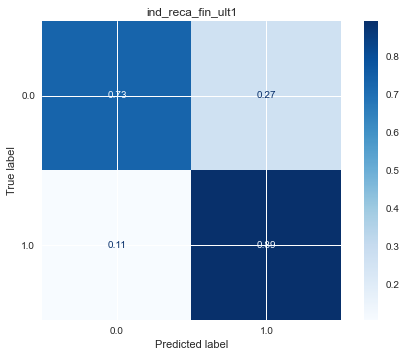

0.86624243950112
ind_reca_fin_ult1
0.86624243950112
Precision : 0.14709032230053404
recall : 0.8928077303173383
Accuracy  : 0.7416777872850268
Balanced_accuracy : 0.813358820357683


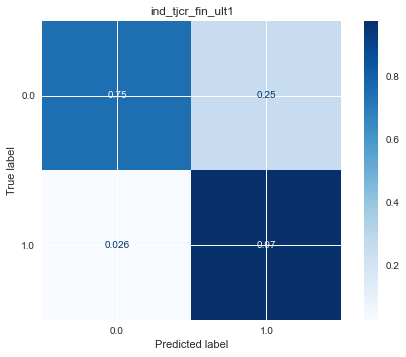

0.9099831761429192
ind_tjcr_fin_ult1
0.9099831761429192
Precision : 0.1293887769432741
recall : 0.9736373556946758
Accuracy  : 0.7540981670572751
Balanced_accuracy : 0.8596046957298336


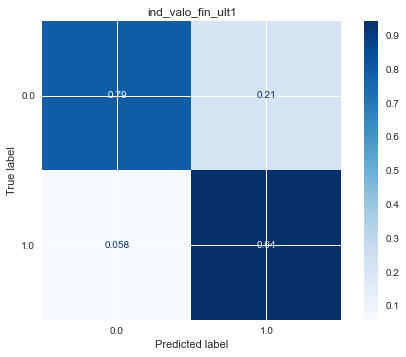

0.9240861783310235
ind_valo_fin_ult1
0.9240861783310235
Precision : 0.09366791353017069
recall : 0.9419863716979371
Accuracy  : 0.7890027730867795
Balanced_accuracy : 0.863693622209648


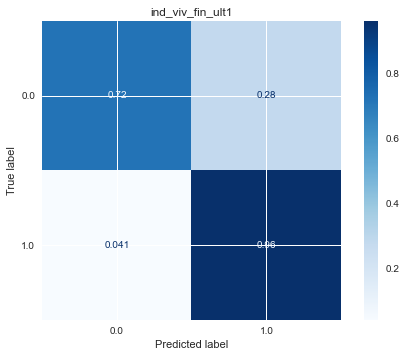

0.9091009159564714
ind_viv_fin_ult1
0.9091009159564714
Precision : 0.010831826263458706
recall : 0.9594457587022642
Accuracy  : 0.7215329168514139
Balanced_accuracy : 0.8401102378047139


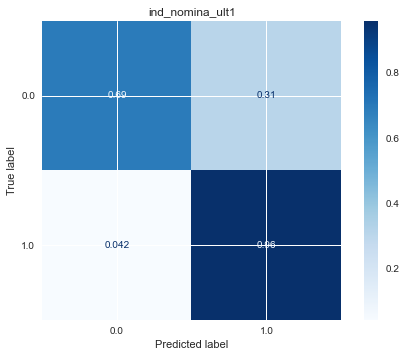

0.8872411802911326
ind_nomina_ult1
0.8872411802911326
Precision : 0.1453023390178574
recall : 0.9578753441387733
Accuracy  : 0.7055911570417401
Balanced_accuracy : 0.8248331319264428


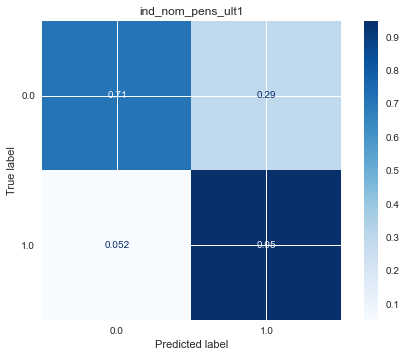

0.8784323964251756
ind_nom_pens_ult1
0.8784323964251756
Precision : 0.1648956312997435
recall : 0.9475476839237057
Accuracy  : 0.7247536912758883
Balanced_accuracy : 0.8294501697769688


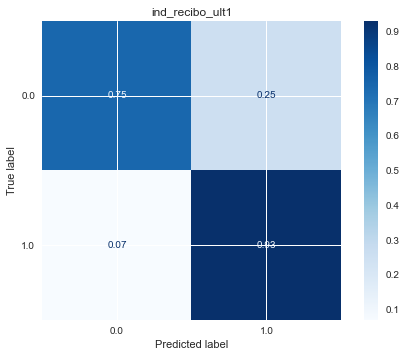

0.8905574329556276
ind_recibo_ult1
0.8905574329556276
Precision : 0.33621963151735296
recall : 0.9301194161875277
Accuracy  : 0.7686496259070505
Balanced_accuracy : 0.8382322160146781


In [115]:
models = {}
model_preds = {}
prediccion_indices = defaultdict(list)
indices = test['ncodpers'].to_numpy()

for product in products:
    
    #Productos con muy baja cantidad de usuarios
    if((product=='ind_ahor_fin_ult1') or (product=='ind_aval_fin_ult1') or (product=='ind_deco_fin_ult1') or (product=='ind_deme_fin_ult1')):
      
       
        ytest = test[product]
        p_train1 = ytest.copy()
        p_train2 = ytest.copy()
        p_train1.loc[:]=0.00001
        
            
            

                             
    else:
        
        #Entrenamiento y predicción para el resto de productos
        ytest = test[product]
    
        ytrain = train[product].values

        clf_model = RandomForestClassifier(max_depth=4, random_state=0, class_weight='balanced', n_jobs=-1)
        clf_model.fit(Xtrain, ytrain)
                
        p_train1 = clf_model.predict_proba(Xtest)[:,1]
        p_train2 = clf_model.predict(Xtest)
        
        disp=plot_confusion_matrix(clf_model, Xtest, ytest,cmap=plt.cm.Blues,
                                 normalize='true')
        disp.ax_.set_title(product)
        plt.grid(False)
        plt.show()  




    for id, p in zip(indices, p_train1):
         prediccion_indices[id].append(p)
        
    print(roc_auc_score(ytest, p_train1))
    print(product)    
    print(roc_auc_score(ytest, p_train1))
    print(f'Precision : {precision_score(ytest,p_train2)}')
    print(f'recall : {recall_score(ytest, p_train2)}')
    print(f'Accuracy  : {accuracy_score(ytest, p_train2)}')
    print(f'Balanced_accuracy : {balanced_accuracy_score(ytest, p_train2)}')   

    


In [69]:
products_cod= ['ncodpers','ind_ahor_fin_ult1','ind_aval_fin_ult1',
 'ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
 'ind_ecue_fin_ult1','ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1',
 'ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
 'ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']

<p> seleccionar los 7 productos que mas se relacionan a cada usuario, evitando seleccionar los que el usuario posee</p>

In [257]:
from itertools import islice

producto = {}

for row in data_frames_normal[16][products_cod].values:
    row = list(row)
    id = row.pop(0)   
    producto[id] = [producto for producto, estado in zip(tuple(products), row) if estado > 0]
print('1')

prediciones_ncodpers = dict()
lista_recomendaciones = []

for ncodpers, predictions in islice(prediccion_indices.items(), 0, len(prediccion_indices)):
    
    predicciones_sorted = Sort(list(zip(tuple(products), predictions)))
    prediciones_ncodpers[ncodpers] = predicciones_sorted
print('2')
for ncodpers_sample in sample['ncodpers']:
    
     lista_recomendaciones.append(product_to_recommend(prediciones_ncodpers[ncodpers_sample],producto[ncodpers_sample]))
    



1
2


<p>Adicion de las recomendaciones al formato de sample </p>

In [258]:
sample['added_products'] = lista_recomendaciones

<p>Se guardan los datos .csv para subirlos a kaggle</p>

In [259]:
sample.to_csv('Cuarto_octavo_results_forest.csv', index=False)

<h3>Se crean los conjuntos de entramiento y validación.</h3>

<h5>Entrenamiento</h5>
<p>Se toma desde el noveno mes hasta el doceavo mes del mes 2015 las características demográficas</p>   

In [116]:
mes_reference_to_train = data_frames_labeled[11].copy()

mes_reference_to_train 

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,age,fecha_alta,ind_nuevo,antiguedad,ult_fec_cli_1t,...,ind_nom_pens_ult1,ind_recibo_ult1,sexo_0,sexo_1,indresi_0,indresi_1,indext_0,indext_1,indrel_1,indrel_99
0,115651,2015-12-28,1017818,0,0,37,2012-05-29,0.0,43,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
1,115652,2015-12-28,1017819,0,0,51,2012-05-29,0.0,43,Default,...,0.0,0.0,1,0,0,1,0,1,1,0
2,115653,2015-12-28,1017820,0,0,47,2012-05-29,0.0,43,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
3,115654,2015-12-28,1017821,0,0,54,2012-05-29,0.0,43,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
4,115655,2015-12-28,1017823,0,0,40,2012-05-29,0.0,43,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912016,269100,2015-12-28,1400559,0,0,33,2015-06-05,1.0,5,Default,...,0.0,1.0,1,0,0,1,1,0,1,0
912017,269101,2015-12-28,1400560,0,0,49,2015-06-05,0.0,6,2015-12-28,...,0.0,0.0,0,1,0,1,1,0,0,1
912018,269102,2015-12-28,1400546,0,0,38,2015-06-05,0.0,6,Default,...,0.0,0.0,1,0,0,1,0,1,1,0
912019,269103,2015-12-28,1400544,0,0,36,2015-06-05,0.0,6,Default,...,0.0,0.0,1,0,0,1,1,0,1,0


<p>Se realiza una concatenación del mes noveno hasta el mes doceavo del año 2015</p>

In [117]:
data_lags = [mes_reference_to_train,data_frames_labeled[10],\
             data_frames_labeled[9],data_frames_labeled[8]]
mes_to_train_with_lag = pd.concat(data_lags,ignore_index=True, sort =False)
# mes_to_train_with_lag_lag1 = mes_to_train_with_lag_lag1.fillna(0)
mes_to_train_with_lag = mes_to_train_with_lag.drop_duplicates(['ncodpers'], keep='last')
mes_to_train_with_lag.shape

(917625, 53)

In [118]:
mes_to_train_with_lag = mes_to_train_with_lag.fillna(0)
mes_to_train_with_lag

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,age,fecha_alta,ind_nuevo,antiguedad,ult_fec_cli_1t,...,ind_nom_pens_ult1,ind_recibo_ult1,sexo_0,sexo_1,indresi_0,indresi_1,indext_0,indext_1,indrel_1,indrel_99
450,116101,2015-12-28,1017294,0,0,32,2012-05-24,1.0,0,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
1712,117363,2015-12-28,1015824,0,0,37,2015-12-04,0.0,43,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
3403,119054,2015-12-28,1022014,0,0,34,2015-12-14,1.0,0,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
3904,119555,2015-12-28,1023745,0,0,30,2012-07-17,1.0,0,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
5451,121102,2015-12-28,1021664,0,0,65,2012-07-02,1.0,0,2015-12-24,...,0.0,0.0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575816,228112,2015-09-28,1353194,0,0,21,2014-11-12,0.0,10,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
3575817,228113,2015-09-28,1353192,0,0,40,2014-11-12,1.0,5,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
3575818,228114,2015-09-28,1353248,0,0,21,2014-11-12,0.0,10,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
3575819,228115,2015-09-28,1353191,0,0,26,2014-11-12,0.0,10,Default,...,0.0,0.0,0,1,0,1,1,0,1,0


 <hr>

<h3>Entrenamiento y validación</h3>

In [119]:
train = mes_to_train_with_lag.copy()
test = mes_to_all_with_lag.copy()
train.shape , test.shape

((917625, 53), (931453, 53))

<p>Se crea la lista estados la cual nos ayudará determina usuarios que realizaron cambios en sus productos</p>

In [120]:
estados = ["ind_ahor_fin_ult1estado"
,"ind_aval_fin_ult1estado"
,"ind_cco_fin_ult1estado"
,"ind_cder_fin_ult1estado"
,"ind_cno_fin_ult1estado"
,"ind_ctju_fin_ult1estado"
,"ind_ctma_fin_ult1estado"
,"ind_ctop_fin_ult1estado"
,"ind_ctpp_fin_ult1estado"
,"ind_deco_fin_ult1estado"
,"ind_deme_fin_ult1estado"
,"ind_dela_fin_ult1estado"
,"ind_ecue_fin_ult1estado"
,"ind_fond_fin_ult1estado"
,"ind_hip_fin_ult1estado"
,"ind_plan_fin_ult1estado"
,"ind_pres_fin_ult1estado"
,"ind_reca_fin_ult1estado"
,"ind_tjcr_fin_ult1estado"
,"ind_valo_fin_ult1estado"
,"ind_viv_fin_ult1estado"
,"ind_nomina_ult1estado"
,"ind_nom_pens_ult1estado"
,"ind_recibo_ult1estado"]

<p>Se eliminan las columnas 'Unnamed: 0' que crearon al particionar los datos por meses con dask</p>

In [121]:
train_1 = train.drop(columns='Unnamed: 0', axis=1)
test_1 = test.drop(columns='Unnamed: 0', axis=1)

<p>Se eliminan las siguientes columnas de los paquetes de entrenamiento y validación</p>

In [122]:
columns_to_drop = ['fecha_dato','ncodpers','fecha_alta', 'ult_fec_cli_1t','conyuemp',
                    'indfall','pais_residencia', 'tipodom','cod_prov']

In [123]:
Xtrain = train_1.drop(columns=columns_to_drop , axis=1)
Xtrain = Xtrain.drop(columns=products , axis=1)
Xtest = test_1.drop(columns=columns_to_drop , axis=1)
Xtest = Xtest.drop(columns=products , axis=1)
Xtrain.shape, Xtest.shape

((917625, 19), (931453, 19))

In [124]:
for i in Xtrain.columns:
    print(i)

ind_empleado
age
ind_nuevo
antiguedad
indrel_1mes
tiprel_1mes
canal_entrada
nomprov
ind_actividad_cliente
renta
segmento
sexo_0
sexo_1
indresi_0
indresi_1
indext_0
indext_1
indrel_1
indrel_99


<p>df_to_ytrain_1 no permite obtener la y_entrenamineto, los productos</p>

In [125]:
df_to_ytrain_1 =train
df_to_ytrain_1.shape

(917625, 53)

In [126]:
df_to_ytrain_1.shape ,Xtrain.shape

((917625, 53), (917625, 19))

<p>Se igualan el nombre de las columnas por cuestiones de libreria</p>

In [127]:
Xtrain.columns = Xtest.columns
Xtest.shape

(931453, 19)

0.5
ind_ahor_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0
0.5
ind_aval_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0


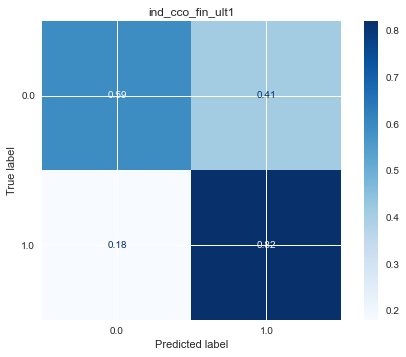

0.7600467710139176
ind_cco_fin_ult1
0.7600467710139176
Precision : 0.75303162568373
recall : 0.8202113547537013
Accuracy  : 0.7294044895448294
Balanced_accuracy : 0.7058608458560226


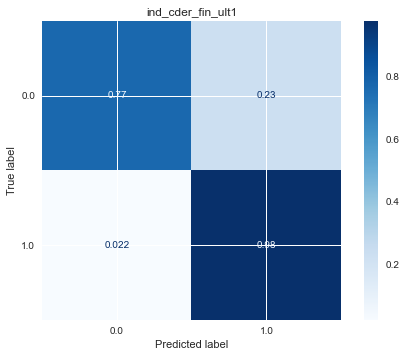

0.9208799686752916
ind_cder_fin_ult1
0.9208799686752916
Precision : 0.0014513651756903377
recall : 0.9778481012658228
Accuracy  : 0.7717533788607691
Balanced_accuracy : 0.8747657688763063


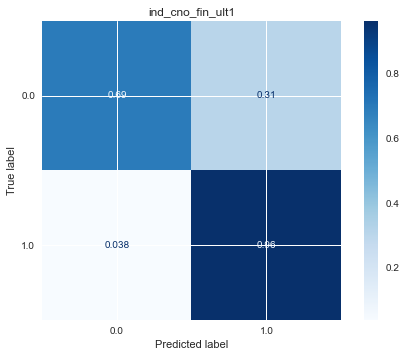

0.8749443591289326
ind_cno_fin_ult1
0.8749443591289326
Precision : 0.21050410105968986
recall : 0.9624970914715101
Accuracy  : 0.7139104173801577
Balanced_accuracy : 0.8276246769205751


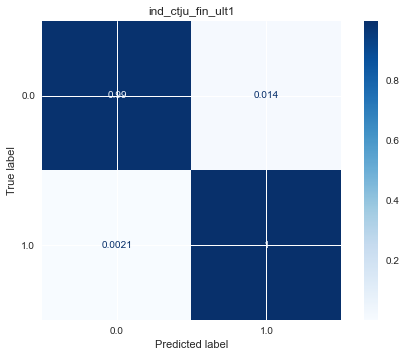

0.9984812744262831
ind_ctju_fin_ult1
0.9984812744262831
Precision : 0.3748018232263179
recall : 0.9978894604933386
Accuracy  : 0.9864351717155885
Balanced_accuracy : 0.9921153209778528


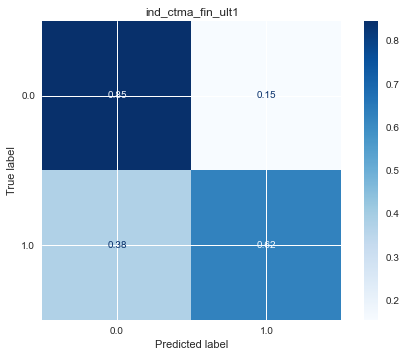

0.8379850459293723
ind_ctma_fin_ult1
0.8379850459293723
Precision : 0.03416480767930778
recall : 0.6241817957268124
Accuracy  : 0.8433426055850376
Balanced_accuracy : 0.7347231220542925


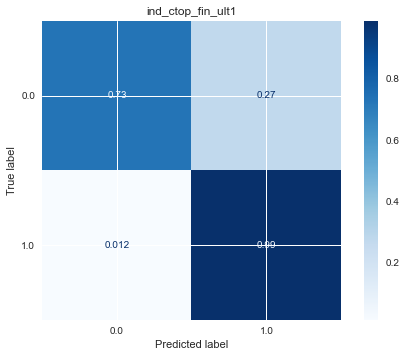

0.9104291323648281
ind_ctop_fin_ult1
0.9104291323648281
Precision : 0.30713268480446826
recall : 0.9883883923689469
Accuracy  : 0.7579545076348457
Balanced_accuracy : 0.8592226484943581


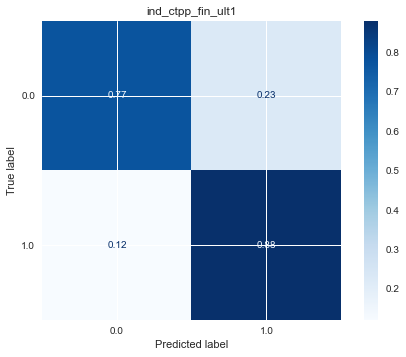

0.8887991191570617
ind_ctpp_fin_ult1
0.8887991191570617
Precision : 0.12564554973147707
recall : 0.8796850109705149
Accuracy  : 0.7770408168742814
Balanced_accuracy : 0.8264618098133335
0.5
ind_deco_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0
0.5
ind_deme_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0


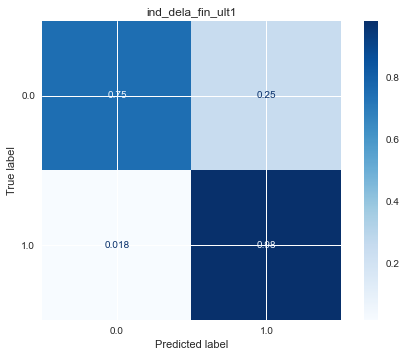

0.9400825388103734
ind_dela_fin_ult1
0.9400825388103734
Precision : 0.12075036234167244
recall : 0.9821251241310824
Accuracy  : 0.7597270071597816
Balanced_accuracy : 0.8670700756508678


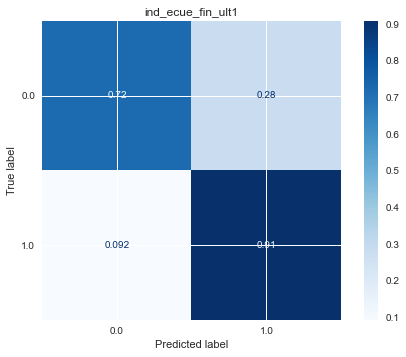

0.878749654552161
ind_ecue_fin_ult1
0.878749654552161
Precision : 0.22474030256139044
recall : 0.9076669523370031
Accuracy  : 0.7375294298263037
Balanced_accuracy : 0.8150573076427281


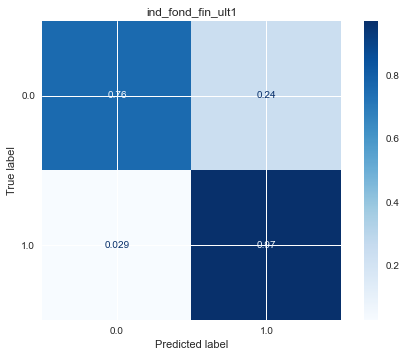

0.9334163614041413
ind_fond_fin_ult1
0.9334163614041413
Precision : 0.06098061515045277
recall : 0.971130932116838
Accuracy  : 0.763750828007425
Balanced_accuracy : 0.8657797192048053


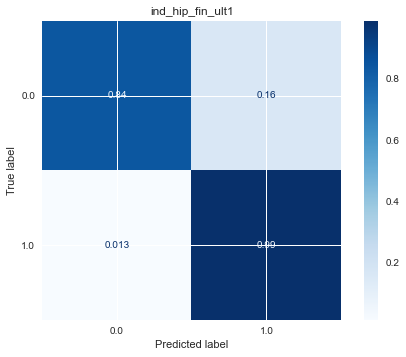

0.9476312399865775
ind_hip_fin_ult1
0.9476312399865775
Precision : 0.02954225375394238
recall : 0.9867491166077739
Accuracy  : 0.8423613429770477
Balanced_accuracy : 0.9142025648847861


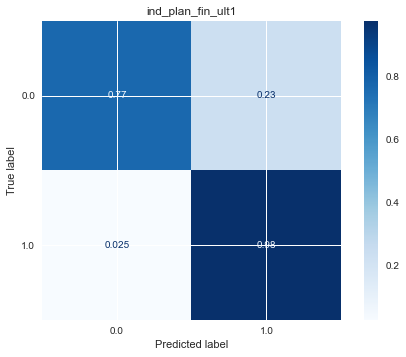

0.9366552872137147
ind_plan_fin_ult1
0.9366552872137147
Precision : 0.03261580975929023
recall : 0.975132490827558
Accuracy  : 0.771300323258393
Balanced_accuracy : 0.8724048007988372


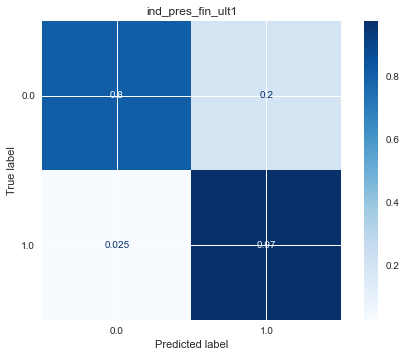

0.9560988161218383
ind_pres_fin_ult1
0.9560988161218383
Precision : 0.010591971711086372
recall : 0.9748869914615771
Accuracy  : 0.8052923765342964
Balanced_accuracy : 0.8899080397358151


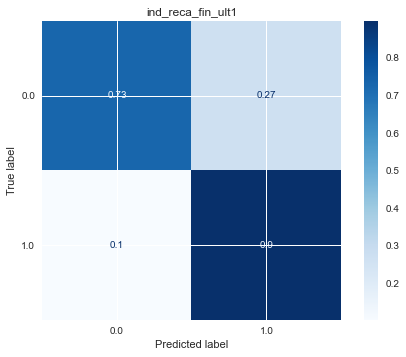

0.8668789209277036
ind_reca_fin_ult1
0.8668789209277036
Precision : 0.1462331131228517
recall : 0.897858789941803
Accuracy  : 0.7387436617843305
Balanced_accuracy : 0.8142120735032261


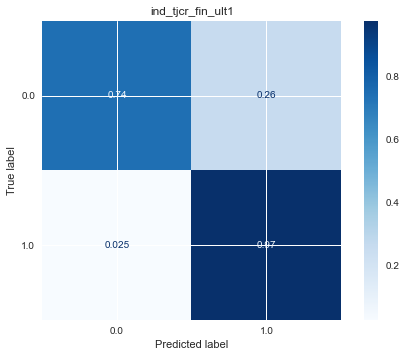

0.9104787598755272
ind_tjcr_fin_ult1
0.9104787598755272
Precision : 0.12891498987658168
recall : 0.9745850324507496
Accuracy  : 0.752860316086802
Balanced_accuracy : 0.85941716951084


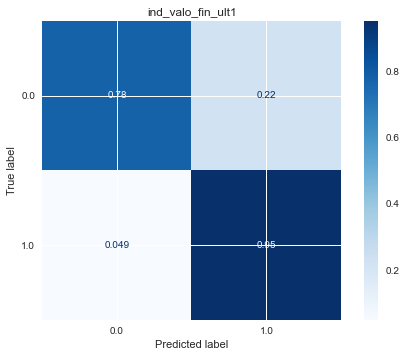

0.9240165657093571
ind_valo_fin_ult1
0.9240165657093571
Precision : 0.09075762030775263
recall : 0.9508074302249603
Accuracy  : 0.7797548561226385
Balanced_accuracy : 0.8632674817919304


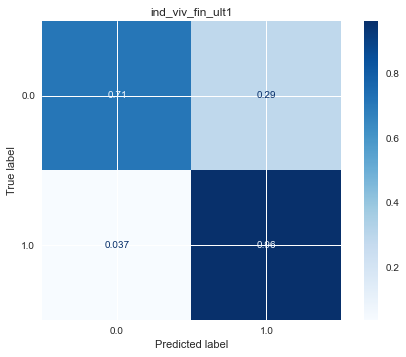

0.9058243692357213
ind_viv_fin_ult1
0.9058243692357213
Precision : 0.010571295039280707
recall : 0.9631632308212233
Accuracy  : 0.7135045998026739
Balanced_accuracy : 0.8379360991229459


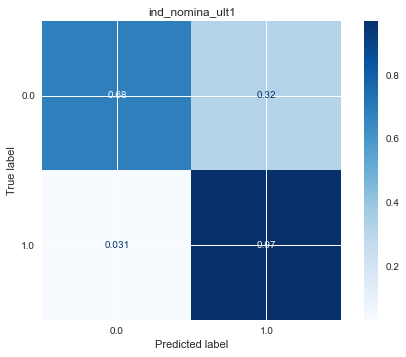

0.8877033606614753
ind_nomina_ult1
0.8877033606614753
Precision : 0.14331669304015401
recall : 0.9692603862634291
Accuracy  : 0.6979149779967427
Balanced_accuracy : 0.8261662280252313


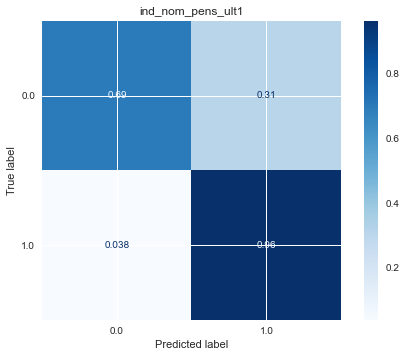

0.8786176832359808
ind_nom_pens_ult1
0.8786176832359808
Precision : 0.15804384129067167
recall : 0.9616636391159552
Accuracy  : 0.7071532326376103
Balanced_accuracy : 0.8267540485459757


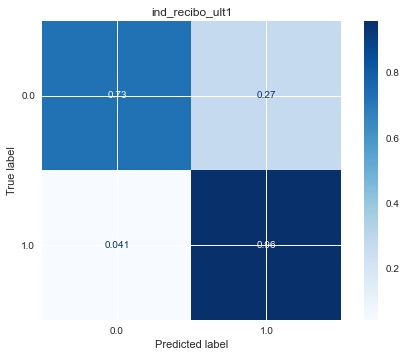

0.8930329898497915
ind_recibo_ult1
0.8930329898497915
Precision : 0.32819950770982126
recall : 0.9588854489164087
Accuracy  : 0.7567896608846608
Balanced_accuracy : 0.8438793162106784


In [128]:
models = {}
model_preds = {}
prediccion_indices = defaultdict(list)
indices = test['ncodpers'].to_numpy()

for product in products:
    
    #Productos con muy baja cantidad de usuarios
    if((product=='ind_ahor_fin_ult1') or (product=='ind_aval_fin_ult1') or (product=='ind_deco_fin_ult1') or (product=='ind_deme_fin_ult1')):
      
       
        ytest = test[product]
        p_train1 = ytest.copy()
        p_train2 = ytest.copy()
        p_train1.loc[:]=0.00001
        
            
            

                             
    else:
        
        #Entrenamiento y predicción para el resto de productos
        ytest = test[product]
    
        ytrain = df_to_ytrain_1[product].values

        clf_model = RandomForestClassifier(max_depth=4, random_state=0, class_weight='balanced', n_jobs=-1)
        clf_model.fit(Xtrain, ytrain)
                
        p_train1 = clf_model.predict_proba(Xtest)[:,1]
        p_train2 = clf_model.predict(Xtest)
        
        disp=plot_confusion_matrix(clf_model, Xtest, ytest,cmap=plt.cm.Blues,
                                 normalize='true')
        disp.ax_.set_title(product)
        plt.grid(False)
        plt.show() 
                         




    for id, p in zip(indices, p_train1):
         prediccion_indices[id].append(p)
        
    print(roc_auc_score(ytest, p_train1))
    print(product)    
    print(roc_auc_score(ytest, p_train1))
    print(f'Precision : {precision_score(ytest,p_train2)}')
    print(f'recall : {recall_score(ytest, p_train2)}')
    print(f'Accuracy  : {accuracy_score(ytest, p_train2)}')
    print(f'Balanced_accuracy : {balanced_accuracy_score(ytest, p_train2)}')   

    


In [69]:
products_cod= ['ncodpers','ind_ahor_fin_ult1','ind_aval_fin_ult1',
 'ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
 'ind_ecue_fin_ult1','ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1',
 'ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
 'ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']

<p>Función para seleccionar los 7 productos que mas se relacionan a cada usuario, evitando seleccionar los que el usuario posee</p>

In [70]:
def product_to_recommend(rec, lista_actual):
    
    lista = lista_actual
    lista_sample = list()
    for i in rec:
        lista_sample.append((lambda x: x[0])(i))
        
    for _,value in enumerate(lista):
        if value in lista_sample:
            lista_sample.remove(value)  
    
    return ' '.join(lista_sample[:7])

<p>Función para organizar los productos</p>

In [71]:
def Sort(sub_li):
    
    return(sorted(sub_li, key = lambda x: x[1],reverse=True)) 

In [278]:
from itertools import islice

producto = {}

for row in data_frames_normal[16][products_cod].values:
    row = list(row)
    id = row.pop(0)   
    producto[id] = [producto for producto, estado in zip(tuple(products), row) if estado > 0]
print('1')

prediciones_ncodpers = dict()
lista_recomendaciones = []

for ncodpers, predictions in islice(prediccion_indices.items(), 0, len(prediccion_indices)):
    
    predicciones_sorted = Sort(list(zip(tuple(products), predictions)))
    prediciones_ncodpers[ncodpers] = predicciones_sorted
print('2')
for ncodpers_sample in sample['ncodpers']:
    
     lista_recomendaciones.append(product_to_recommend(prediciones_ncodpers[ncodpers_sample],producto[ncodpers_sample]))
    



1
2


<p>Adicion de las recomendaciones al formato de sample </p>

In [279]:
sample['added_products'] = lista_recomendaciones

<p>Se guardan los datos .csv para subirlos a kaggle</p>

In [280]:
sample.to_csv('noveno_doceavo_results_forest.csv', index=False)

<h3>Se crean los conjuntos de entramiento y validación.</h3>

<h5>Entrenamiento</h5>
<p>Se toma desde el primer mes hasta el cuarto mes del 2016 las características demográficas</p>   

In [129]:
mes_reference_to_train = data_frames_labeled[15].copy()

mes_reference_to_train 

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,age,fecha_alta,ind_nuevo,antiguedad,ult_fec_cli_1t,...,ind_nom_pens_ult1,ind_recibo_ult1,sexo_0,sexo_1,indresi_0,indresi_1,indext_0,indext_1,indrel_1,indrel_99
0,358704,2016-04-28,896836,0,0,72,2010-11-12,0.0,65,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
1,358705,2016-04-28,896837,0,0,57,2010-11-12,0.0,65,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
2,358706,2016-04-28,896839,0,0,39,2010-11-12,0.0,65,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
3,358707,2016-04-28,896853,0,0,71,2010-11-12,0.0,65,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
4,358708,2016-04-28,896849,0,0,25,2010-11-12,0.0,65,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928269,144346,2016-04-28,1297410,0,0,47,2014-08-18,0.0,20,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
928270,144347,2016-04-28,1297411,0,0,41,2014-08-18,0.0,20,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
928271,144348,2016-04-28,1297412,0,0,34,2014-08-18,0.0,20,Default,...,0.0,1.0,1,0,0,1,1,0,1,0
928272,144349,2016-04-28,1297392,0,0,44,2014-08-18,0.0,20,Default,...,0.0,0.0,0,1,0,1,1,0,1,0


<p>Se realiza una concatenación de los meses pertenecientes al 2016</p>

In [130]:
data_lags = [mes_reference_to_train,data_frames_labeled[14],\
             data_frames_labeled[13],data_frames_labeled[12]]
mes_to_train_with_lag =  pd.concat(data_lags,ignore_index=True, sort =False) 
mes_to_train_with_lag = mes_to_train_with_lag.drop_duplicates(['ncodpers'], keep='last')
# mes_to_train_with_lag_lag1 = mes_to_train_with_lag_lag1.fillna(0)
mes_to_train_with_lag.shape

(933668, 53)

In [131]:
mes_to_train_with_lag = mes_to_train_with_lag.fillna(0)
mes_to_train_with_lag

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,age,fecha_alta,ind_nuevo,antiguedad,ult_fec_cli_1t,...,ind_nom_pens_ult1,ind_recibo_ult1,sexo_0,sexo_1,indresi_0,indresi_1,indext_0,indext_1,indrel_1,indrel_99
1268,359972,2016-04-28,895634,0,0,30,2016-04-13,1.0,0,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
1663,360367,2016-04-28,654302,0,0,37,2006-11-06,1.0,0,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
1708,360412,2016-04-28,654323,0,0,39,2006-11-06,0.0,105,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
1964,360668,2016-04-28,654137,0,0,22,2006-11-05,1.0,0,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
2651,361355,2016-04-28,652836,0,0,34,2006-10-31,1.0,0,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3690518,39384,2016-01-28,1036408,0,0,23,2012-07-30,0.0,42,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
3690519,39385,2016-01-28,1036429,0,0,23,2012-07-30,0.0,42,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
3690520,39386,2016-01-28,1036406,0,0,24,2012-07-30,0.0,42,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
3690521,39387,2016-01-28,1036405,0,0,25,2012-07-30,0.0,42,Default,...,0.0,0.0,0,1,0,1,1,0,1,0


<h3>Entrenamiento y validación</h3>

In [132]:
train = mes_to_train_with_lag.copy()
test = mes_to_all_with_lag.copy()
train.shape , test.shape

((933668, 53), (931453, 53))

<p>Se crea la lista estados la cual nos ayudará determina usuarios que realizaron cambios en sus productos</p>

In [133]:
estados = ["ind_ahor_fin_ult1estado"
,"ind_aval_fin_ult1estado"
,"ind_cco_fin_ult1estado"
,"ind_cder_fin_ult1estado"
,"ind_cno_fin_ult1estado"
,"ind_ctju_fin_ult1estado"
,"ind_ctma_fin_ult1estado"
,"ind_ctop_fin_ult1estado"
,"ind_ctpp_fin_ult1estado"
,"ind_deco_fin_ult1estado"
,"ind_deme_fin_ult1estado"
,"ind_dela_fin_ult1estado"
,"ind_ecue_fin_ult1estado"
,"ind_fond_fin_ult1estado"
,"ind_hip_fin_ult1estado"
,"ind_plan_fin_ult1estado"
,"ind_pres_fin_ult1estado"
,"ind_reca_fin_ult1estado"
,"ind_tjcr_fin_ult1estado"
,"ind_valo_fin_ult1estado"
,"ind_viv_fin_ult1estado"
,"ind_nomina_ult1estado"
,"ind_nom_pens_ult1estado"
,"ind_recibo_ult1estado"]

<p>Se eliminan las columnas 'Unnamed: 0' que crearon al particionar los datos por meses con dask</p>

In [134]:
train_1 = train.drop(columns='Unnamed: 0', axis=1)
test_1 = test.drop(columns='Unnamed: 0', axis=1)

<p>Se eliminan las siguientes columnas de los paquetes de entrenamiento y validación</p>

In [135]:
columns_to_drop = ['fecha_dato','ncodpers','fecha_alta', 'ult_fec_cli_1t','conyuemp',
                    'indfall','pais_residencia', 'tipodom','cod_prov']

In [136]:
Xtrain = train_1.drop(columns=columns_to_drop , axis=1)
Xtrain = Xtrain.drop(columns=products , axis=1)
Xtest = test_1.drop(columns=columns_to_drop , axis=1)
Xtest = Xtest.drop(columns=products , axis=1)
Xtrain.shape, Xtest.shape

((933668, 19), (931453, 19))

In [137]:
for i in Xtrain.columns:
    print(i)

ind_empleado
age
ind_nuevo
antiguedad
indrel_1mes
tiprel_1mes
canal_entrada
nomprov
ind_actividad_cliente
renta
segmento
sexo_0
sexo_1
indresi_0
indresi_1
indext_0
indext_1
indrel_1
indrel_99


<p>df_to_ytrain_1 no permite obtener la y_entrenamineto, los productos</p>

In [138]:
# filter_to_ytrain = data_frames_normal[2]['ncodpers'].isin(list_pers)
df_to_ytrain_1 =train_1
df_to_ytrain_1.shape

(933668, 52)

In [139]:
df_to_ytrain_1.shape ,Xtrain.shape

((933668, 52), (933668, 19))

<p>Se igualan el nombre de las columnas por cuestiones de libreria</p>

In [140]:
Xtrain.columns = Xtest.columns
Xtest.shape

(931453, 19)

0.5
ind_ahor_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0
0.5
ind_aval_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0


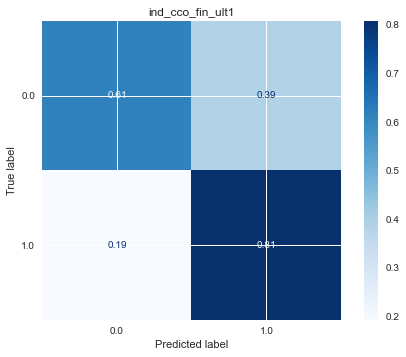

0.7634396602905081
ind_cco_fin_ult1
0.7634396602905081
Precision : 0.7603321305450107
recall : 0.8074143318821613
Accuracy  : 0.7304265486288627
Balanced_accuracy : 0.7104658008028308


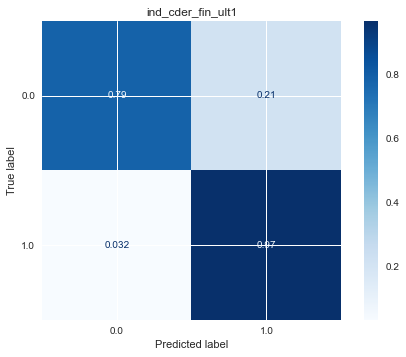

0.9226287493921783
ind_cder_fin_ult1
0.9226287493921783
Precision : 0.0015499949346570762
recall : 0.9683544303797469
Accuracy  : 0.7883693541166328
Balanced_accuracy : 0.8783313514770148


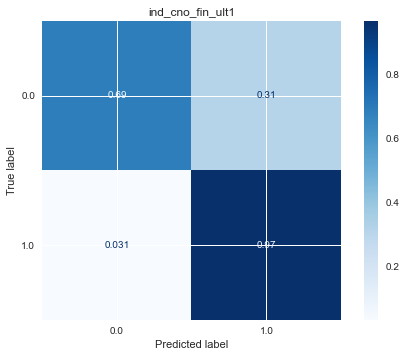

0.8745077858108583
ind_cno_fin_ult1
0.8745077858108583
Precision : 0.20818501150290955
recall : 0.9685742051162727
Accuracy  : 0.7085789621161777
Balanced_accuracy : 0.8275119928180642


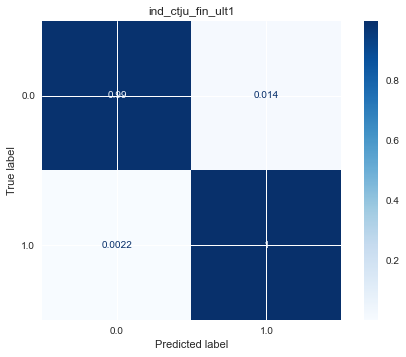

0.9987101063676073
ind_ctju_fin_ult1
0.9987101063676073
Precision : 0.37534736006351727
recall : 0.9977575517741722
Accuracy  : 0.9864673794598332
Balanced_accuracy : 0.992066143834161


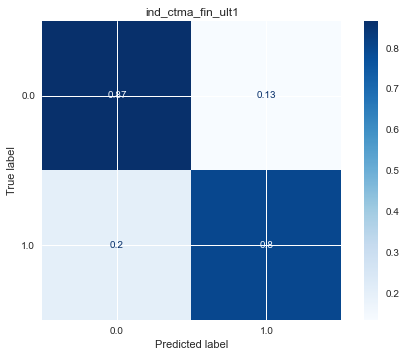

0.9031629411747739
ind_ctma_fin_ult1
0.9031629411747739
Precision : 0.04953130513493196
recall : 0.7974558478448808
Accuracy  : 0.8652159582931184
Balanced_accuracy : 0.8316330006209185


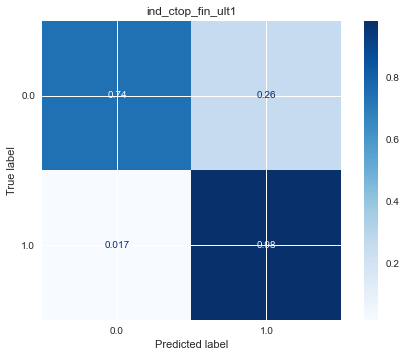

0.9116093897707778
ind_ctop_fin_ult1
0.9116093897707778
Precision : 0.31604524106201476
recall : 0.9833977870343675
Accuracy  : 0.7683823016298192
Balanced_accuracy : 0.8628745612558268


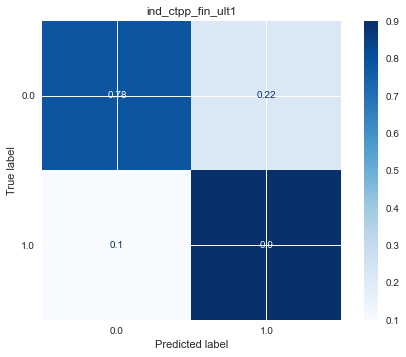

0.9005347738736469
ind_ctpp_fin_ult1
0.9005347738736469
Precision : 0.1325224439950975
recall : 0.9002133990562352
Accuracy  : 0.7859516261153273
Balanced_accuracy : 0.8409662357913694
0.5
ind_deco_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0
0.5
ind_deme_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0


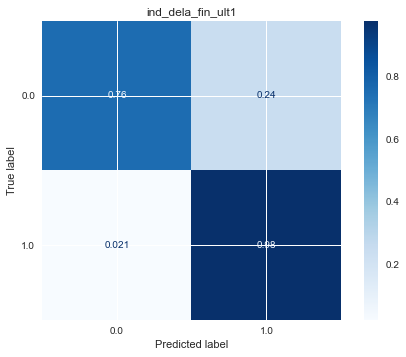

0.9394776411018478
ind_dela_fin_ult1
0.9394776411018478
Precision : 0.12276344345309863
recall : 0.978505301598488
Accuracy  : 0.7649425145444805
Balanced_accuracy : 0.8680211070707107


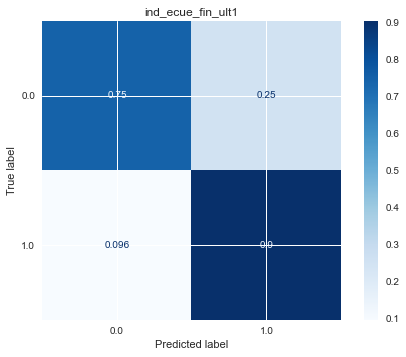

0.8818971665083175
ind_ecue_fin_ult1
0.8818971665083175
Precision : 0.2409814235068006
recall : 0.9042784626540972
Accuracy  : 0.7602863483181653
Balanced_accuracy : 0.8259003462301351


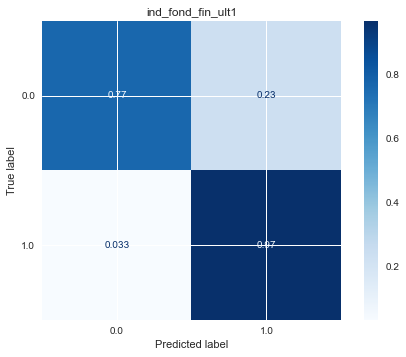

0.933297568691307
ind_fond_fin_ult1
0.933297568691307
Precision : 0.06280139804450736
recall : 0.9665009872676517
Accuracy  : 0.7720475429248711
Balanced_accuracy : 0.8677166496649178


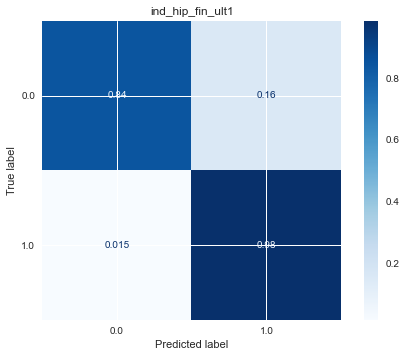

0.9476937283655036
ind_hip_fin_ult1
0.9476937283655036
Precision : 0.030061755029394316
recall : 0.9847614840989399
Accuracy  : 0.8454693902966656
Balanced_accuracy : 0.9147752184094775


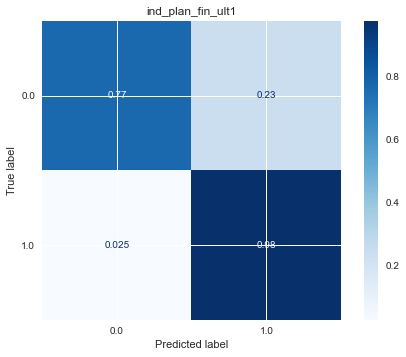

0.9366872696341993
ind_plan_fin_ult1
0.9366872696341993
Precision : 0.032230684941349765
recall : 0.9752683788558228
Accuracy  : 0.7684467171183087
Balanced_accuracy : 0.8710340383610287


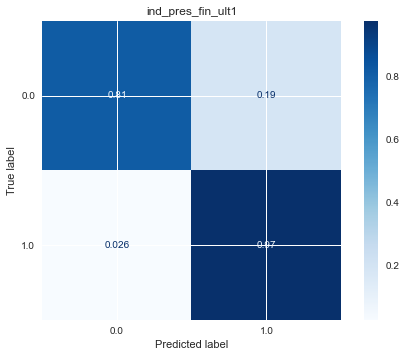

0.9594988114946956
ind_pres_fin_ult1
0.9594988114946956
Precision : 0.010969366107543914
recall : 0.9738824711200402
Accuracy  : 0.8122524700655857
Balanced_accuracy : 0.8928943568280225


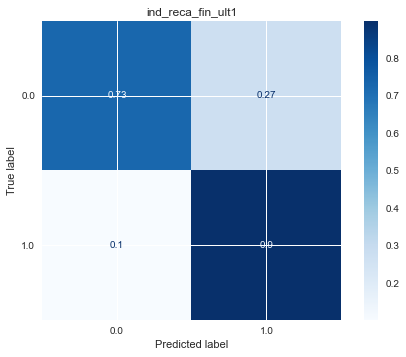

0.8678219325069355
ind_reca_fin_ult1
0.8678219325069355
Precision : 0.14599050711966025
recall : 0.8983858570330515
Accuracy  : 0.7381199051374573
Balanced_accuracy : 0.8141341533251423


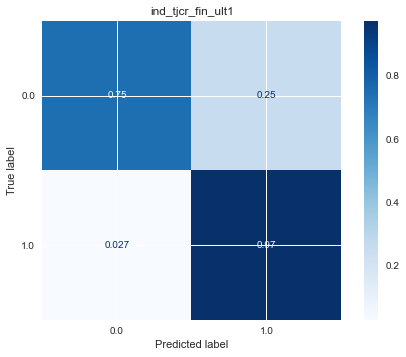

0.9107530016627264
ind_tjcr_fin_ult1
0.9107530016627264
Precision : 0.12977102161062565
recall : 0.9727758313709723
Accuracy  : 0.7551105638180349
Balanced_accuracy : 0.8597165202061865


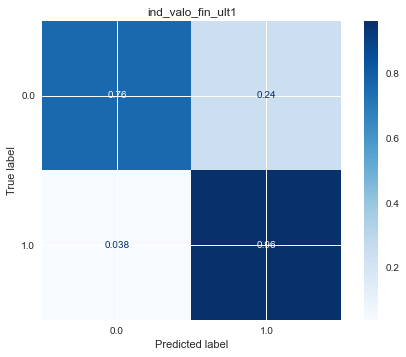

0.9244604852972272
ind_valo_fin_ult1
0.9244604852972272
Precision : 0.08660824980562735
recall : 0.9618220853169047
Accuracy  : 0.7657906518095922
Balanced_accuracy : 0.8614986515975278


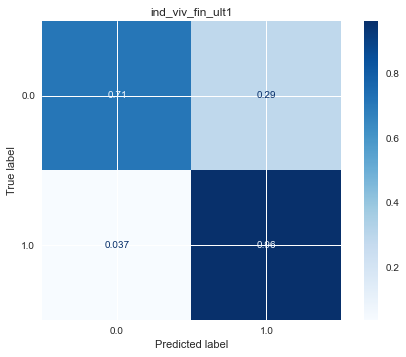

0.9063118227552174
ind_viv_fin_ult1
0.9063118227552174
Precision : 0.010523400720022155
recall : 0.9631632308212233
Accuracy  : 0.7121873030630639
Balanced_accuracy : 0.8372753517190854


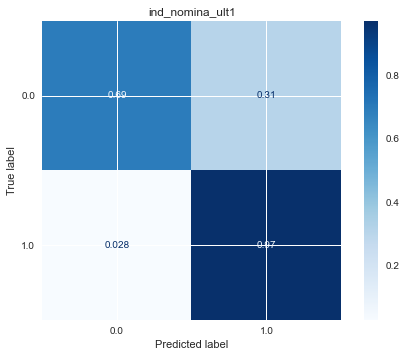

0.8882805744699513
ind_nomina_ult1
0.8882805744699513
Precision : 0.14753377040524487
recall : 0.9717029953010826
Accuracy  : 0.7073357431883305
Balanced_accuracy : 0.8322887717530659


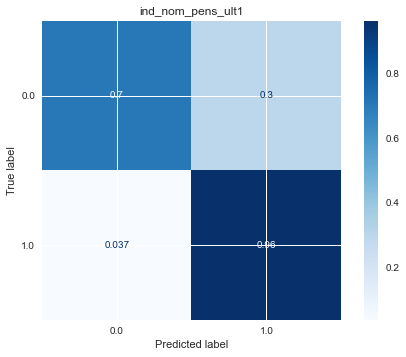

0.8807039543488854
ind_nom_pens_ult1
0.8807039543488854
Precision : 0.16396636620389604
recall : 0.9634234029669997
Accuracy  : 0.7192139592657922
Balanced_accuracy : 0.8339740947091245


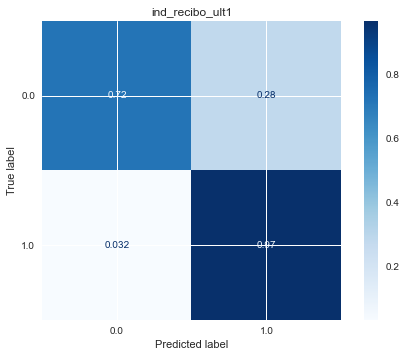

0.892571715166418
ind_recibo_ult1
0.892571715166418
Precision : 0.32390466912820637
recall : 0.9676426360017691
Accuracy  : 0.7509321457980166
Balanced_accuracy : 0.8443197521464094


In [141]:
models = {}
model_preds = {}
prediccion_indices = defaultdict(list)
indices = test['ncodpers'].to_numpy()

for product in products:
    
    #Productos con muy baja cantidad de usuarios
    if((product=='ind_ahor_fin_ult1') or (product=='ind_aval_fin_ult1') or (product=='ind_deco_fin_ult1') or (product=='ind_deme_fin_ult1')):
      
       
        ytest = test[product]
        p_train1 = ytest.copy()
        p_train2 = ytest.copy()
        p_train1.loc[:]=0.00001
        
            
            

                             
    else:
        
        #Entrenamiento y predicción para el resto de productos
        ytest = test[product]
    
        ytrain = df_to_ytrain_1[product].values

        clf_model = RandomForestClassifier(max_depth=4, random_state=0, class_weight='balanced', n_jobs=-1)
        clf_model.fit(Xtrain, ytrain)
                
        p_train1 = clf_model.predict_proba(Xtest)[:,1]
        p_train2 = clf_model.predict(Xtest)
        
        disp=plot_confusion_matrix(clf_model, Xtest, ytest,cmap=plt.cm.Blues,
                                 normalize='true')
        disp.ax_.set_title(product)
        plt.grid(False)
        plt.show() 
                         




    for id, p in zip(indices, p_train1):
         prediccion_indices[id].append(p)
        
    print(roc_auc_score(ytest, p_train1))
    print(product)    
    print(roc_auc_score(ytest, p_train1))
    print(f'Precision : {precision_score(ytest,p_train2)}')
    print(f'recall : {recall_score(ytest, p_train2)}')
    print(f'Accuracy  : {accuracy_score(ytest, p_train2)}')
    print(f'Balanced_accuracy : {balanced_accuracy_score(ytest, p_train2)}')   

    


In [81]:
products_cod= ['ncodpers','ind_ahor_fin_ult1','ind_aval_fin_ult1',
 'ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
 'ind_ecue_fin_ult1','ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1',
 'ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
 'ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']

<p>Seleccionar los 7 productos que mas se relacionan a cada usuario, evitando seleccionar los que el usuario posee</p>

In [82]:
from itertools import islice

producto = {}

for row in data_frames_normal[16][products_cod].values:
    row = list(row)
    id = row.pop(0)   
    producto[id] = [producto for producto, estado in zip(tuple(products), row) if estado > 0]
print('1')

prediciones_ncodpers = dict()
lista_recomendaciones = []

for ncodpers, predictions in islice(prediccion_indices.items(), 0, len(prediccion_indices)):
    
    predicciones_sorted = Sort(list(zip(tuple(products), predictions)))
    prediciones_ncodpers[ncodpers] = predicciones_sorted
print('2')
for ncodpers_sample in sample['ncodpers']:
    
     lista_recomendaciones.append(product_to_recommend(prediciones_ncodpers[ncodpers_sample],producto[ncodpers_sample]))
    



1
2


<p>Adicion de las recomendaciones al formato de sample </p>

In [83]:
sample['added_products'] = lista_recomendaciones

<p>Se guardan los datos .csv para subirlos a kaggle</p>

In [84]:
sample.to_csv('2016_results_forest.csv', index=False)

<h3>Se crean los conjuntos de entramiento y validación.</h3>

<h5>Entrenamiento</h5>
<p>Se toman los usuarios desde el quinto mes del 2015 y todos los meses del 2016, solo las características demográficas</p>   

In [142]:
mes_reference_to_train = data_frames_labeled[15].copy()


mes_reference_to_train 

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,age,fecha_alta,ind_nuevo,antiguedad,ult_fec_cli_1t,...,ind_nom_pens_ult1,ind_recibo_ult1,sexo_0,sexo_1,indresi_0,indresi_1,indext_0,indext_1,indrel_1,indrel_99
0,358704,2016-04-28,896836,0,0,72,2010-11-12,0.0,65,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
1,358705,2016-04-28,896837,0,0,57,2010-11-12,0.0,65,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
2,358706,2016-04-28,896839,0,0,39,2010-11-12,0.0,65,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
3,358707,2016-04-28,896853,0,0,71,2010-11-12,0.0,65,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
4,358708,2016-04-28,896849,0,0,25,2010-11-12,0.0,65,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928269,144346,2016-04-28,1297410,0,0,47,2014-08-18,0.0,20,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
928270,144347,2016-04-28,1297411,0,0,41,2014-08-18,0.0,20,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
928271,144348,2016-04-28,1297412,0,0,34,2014-08-18,0.0,20,Default,...,0.0,1.0,1,0,0,1,1,0,1,0
928272,144349,2016-04-28,1297392,0,0,44,2014-08-18,0.0,20,Default,...,0.0,0.0,0,1,0,1,1,0,1,0


<p>Se realiza una concatenación desde el Septimo mes del 2015 hasta el ultimo mes disponible del 2016</p>

In [143]:
data_lags = [mes_reference_to_train,data_frames_labeled[14],data_frames_labeled[13],data_frames_labeled[12],\
             data_frames_labeled[11],data_frames_labeled[10],data_frames_labeled[9],\
            data_frames_labeled[8],data_frames_labeled[7],data_frames_labeled[6]
            ]
mes_to_train_with_lag =  pd.concat(data_lags,ignore_index=True, sort =False) 
mes_to_train_with_lag = mes_to_train_with_lag.drop_duplicates(['ncodpers'], keep='last')

mes_to_train_with_lag.shape

(944901, 53)

In [144]:
mes_to_train_with_lag = mes_to_train_with_lag.fillna(0)
mes_to_train_with_lag

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,age,fecha_alta,ind_nuevo,antiguedad,ult_fec_cli_1t,...,ind_nom_pens_ult1,ind_recibo_ult1,sexo_0,sexo_1,indresi_0,indresi_1,indext_0,indext_1,indrel_1,indrel_99
1268,359972,2016-04-28,895634,0,0,30,2016-04-13,1.0,0,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
1663,360367,2016-04-28,654302,0,0,37,2006-11-06,1.0,0,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
1708,360412,2016-04-28,654323,0,0,39,2006-11-06,0.0,105,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
1964,360668,2016-04-28,654137,0,0,22,2006-11-05,1.0,0,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
2651,361355,2016-04-28,652836,0,0,34,2006-10-31,1.0,0,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939357,42389,2015-07-28,1407968,0,0,20,2015-07-17,1.0,0,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
8939358,42390,2015-07-28,1407967,0,0,21,2015-07-17,1.0,0,Default,...,0.0,0.0,0,1,0,1,1,0,1,0
8939359,42391,2015-07-28,1407964,0,0,23,2015-07-17,1.0,0,Default,...,0.0,0.0,1,0,0,1,1,0,1,0
8939360,42392,2015-07-28,952008,0,0,26,2011-09-30,0.0,46,Default,...,0.0,0.0,1,0,0,1,1,0,1,0


 <hr>

<h3>Parte final del notebook, entrenamiento y validación</h3>

In [145]:
train = mes_to_train_with_lag.copy()
test = mes_to_all_with_lag.copy()
train.shape , test.shape

((944901, 53), (931453, 53))

<p>Se crea la lista estados la cual nos ayudará determina usuarios que realizaron cambios en sus productos</p>

In [54]:
estados = ["ind_ahor_fin_ult1estado"
,"ind_aval_fin_ult1estado"
,"ind_cco_fin_ult1estado"
,"ind_cder_fin_ult1estado"
,"ind_cno_fin_ult1estado"
,"ind_ctju_fin_ult1estado"
,"ind_ctma_fin_ult1estado"
,"ind_ctop_fin_ult1estado"
,"ind_ctpp_fin_ult1estado"
,"ind_deco_fin_ult1estado"
,"ind_deme_fin_ult1estado"
,"ind_dela_fin_ult1estado"
,"ind_ecue_fin_ult1estado"
,"ind_fond_fin_ult1estado"
,"ind_hip_fin_ult1estado"
,"ind_plan_fin_ult1estado"
,"ind_pres_fin_ult1estado"
,"ind_reca_fin_ult1estado"
,"ind_tjcr_fin_ult1estado"
,"ind_valo_fin_ult1estado"
,"ind_viv_fin_ult1estado"
,"ind_nomina_ult1estado"
,"ind_nom_pens_ult1estado"
,"ind_recibo_ult1estado"]

<p>Se eliminan las columnas 'Unnamed: 0' que crearon al particionar los datos por meses con dask</p>

In [146]:
train_1 = train.drop(columns='Unnamed: 0', axis=1)
test_1 = test.drop(columns='Unnamed: 0', axis=1)

<p>Se eliminan las siguientes columnas de los paquetes de entrenamiento y validación</p>

In [147]:
columns_to_drop = ['fecha_dato','ncodpers','fecha_alta', 'ult_fec_cli_1t','conyuemp',
                    'indfall','pais_residencia', 'tipodom','cod_prov']

In [148]:
Xtrain = train_1.drop(columns=columns_to_drop , axis=1)
Xtrain = Xtrain.drop(columns=products , axis=1)
Xtest = test_1.drop(columns=columns_to_drop , axis=1)
Xtest = Xtest.drop(columns=products , axis=1)
Xtrain.shape, Xtest.shape

((944901, 19), (931453, 19))

In [149]:
for i in Xtrain.columns:
    print(i)

ind_empleado
age
ind_nuevo
antiguedad
indrel_1mes
tiprel_1mes
canal_entrada
nomprov
ind_actividad_cliente
renta
segmento
sexo_0
sexo_1
indresi_0
indresi_1
indext_0
indext_1
indrel_1
indrel_99


<p>Se cargan los datos sample_submission.csv los cuales son una guía que ofrece kaggle de el formato que se debe subir a su página.</p>

In [57]:
sample = pd.read_csv("sample_submission.csv")

<p>df_to_ytrain_1 no permite obtener la y_entrenamineto, los productos</p>

In [150]:
df_to_ytrain_1 =train_1
df_to_ytrain_1.shape

(944901, 52)

In [151]:
df_to_ytrain_1.shape ,Xtrain.shape

((944901, 52), (944901, 19))

<p>Se igualan el nombre de las columnas por cuestiones de libreria</p>

In [152]:
Xtrain.columns = Xtest.columns
Xtest.shape

(931453, 19)

0.5
ind_ahor_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0
0.5
ind_aval_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0


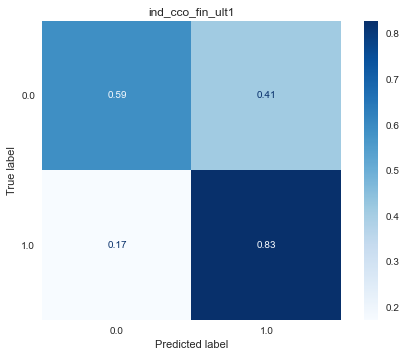

0.7579646755563987
ind_cco_fin_ult1
0.7579646755563987
Precision : 0.7526422507474095
recall : 0.8274903626149587
Accuracy  : 0.7320111696457041
Balanced_accuracy : 0.7072561239364141


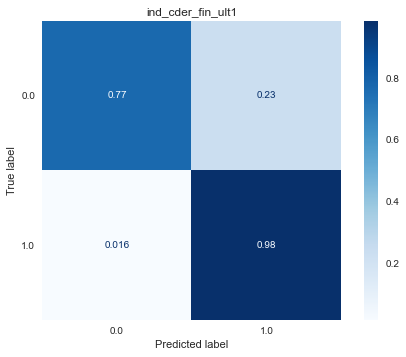

0.9216095789137503
ind_cder_fin_ult1
0.9216095789137503
Precision : 0.0014465587251677962
recall : 0.9841772151898734
Accuracy  : 0.7695138670442846
Balanced_accuracy : 0.8768091159626634


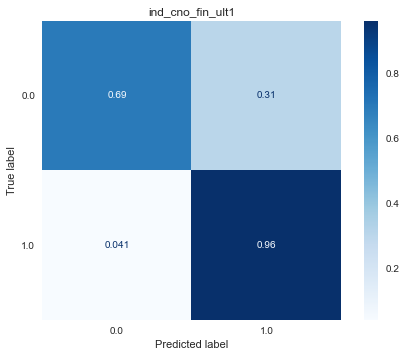

0.8757427629021151
ind_cno_fin_ult1
0.8757427629021151
Precision : 0.21099608357842325
recall : 0.95934903710598
Accuracy  : 0.7154231077681859
Balanced_accuracy : 0.8270053417666267


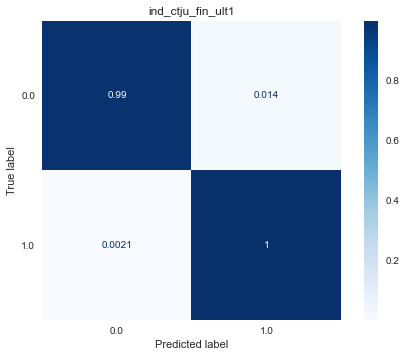

0.9984534175558923
ind_ctju_fin_ult1
0.9984534175558923
Precision : 0.3689344062423799
recall : 0.9978894604933386
Accuracy  : 0.9860905488521696
Balanced_accuracy : 0.9919415956133002


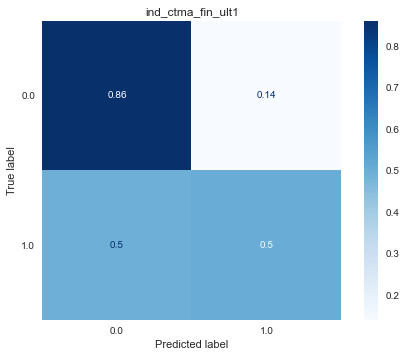

0.790887899952509
ind_ctma_fin_ult1
0.790887899952509
Precision : 0.030599681691240502
recall : 0.5033963196245523
Accuracy  : 0.8570523687185505
Balanced_accuracy : 0.6817749665910267


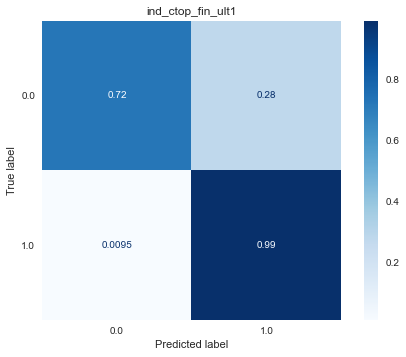

0.909746196689517
ind_ctop_fin_ult1
0.909746196689517
Precision : 0.3031846591081981
recall : 0.9905456859099901
Accuracy  : 0.7531265667725586
Balanced_accuracy : 0.8574644892412706


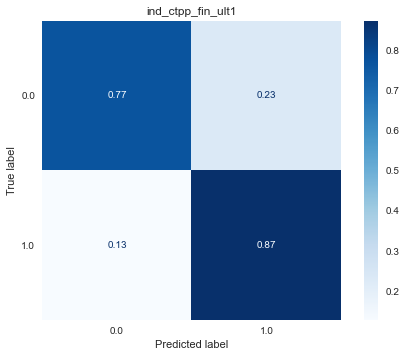

0.8853055678891701
ind_ctpp_fin_ult1
0.8853055678891701
Precision : 0.12292664321735813
recall : 0.87184034143849
Accuracy  : 0.7732284935471785
Balanced_accuracy : 0.8207079976852719
0.5
ind_deco_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0
0.5
ind_deme_fin_ult1
0.5
Precision : 1.0
recall : 1.0
Accuracy  : 1.0
Balanced_accuracy : 1.0


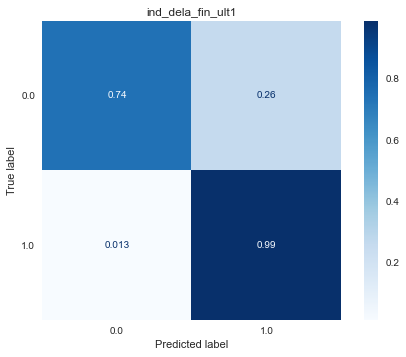

0.9395034355395975
ind_dela_fin_ult1
0.9395034355395975
Precision : 0.11734540429209385
recall : 0.9873786718775026
Accuracy  : 0.7506691158866846
Balanced_accuracy : 0.8649197688474553


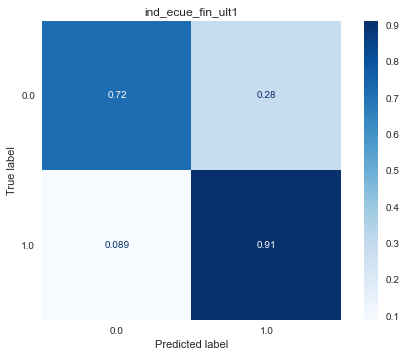

0.8781914024706806
ind_ecue_fin_ult1
0.8781914024706806
Precision : 0.22120030977387786
recall : 0.9113586920693519
Accuracy  : 0.731508728835486
Balanced_accuracy : 0.8134623494661539


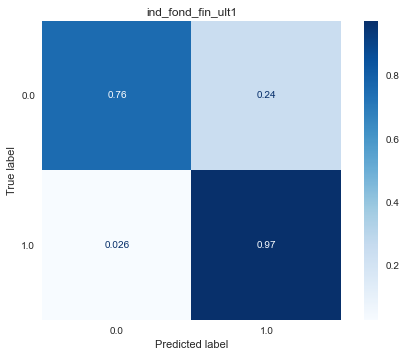

0.933187941570424
ind_fond_fin_ult1
0.933187941570424
Precision : 0.06044566949772346
recall : 0.9735139919656839
Accuracy  : 0.7609820355938518
Balanced_accuracy : 0.8655455854375119


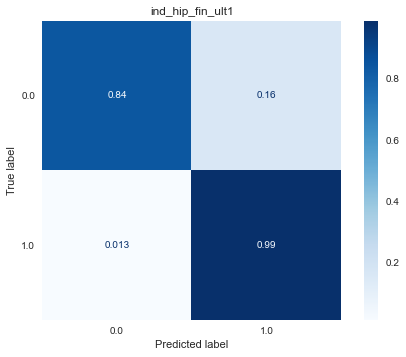

0.9466919292493294
ind_hip_fin_ult1
0.9466919292493294
Precision : 0.029286290031914127
recall : 0.986969964664311
Accuracy  : 0.8409077001201349
Balanced_accuracy : 0.9135820775663978


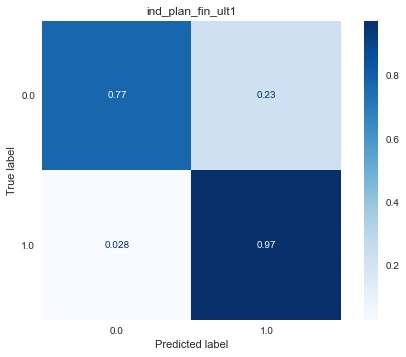

0.9362643024229035
ind_plan_fin_ult1
0.9362643024229035
Precision : 0.033027209470909
recall : 0.9720070661774698
Accuracy  : 0.774940871949524
Balanced_accuracy : 0.8726893031510878


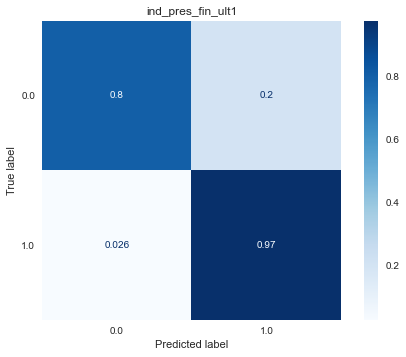

0.9549814966110654
ind_pres_fin_ult1
0.9549814966110654
Precision : 0.0104648779277384
recall : 0.9743847312908086
Accuracy  : 0.8030034795099699
Balanced_accuracy : 0.8885105475613944


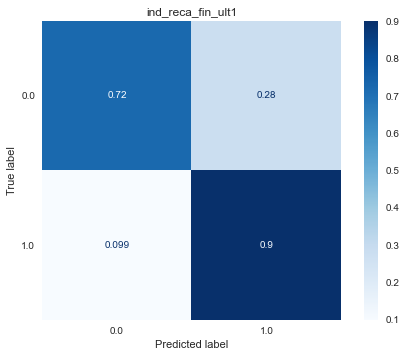

0.865923286839435
ind_reca_fin_ult1
0.865923286839435
Precision : 0.14345695067891653
recall : 0.9011749203909081
Accuracy  : 0.7321292647079348
Balanced_accuracy : 0.8123077322748113


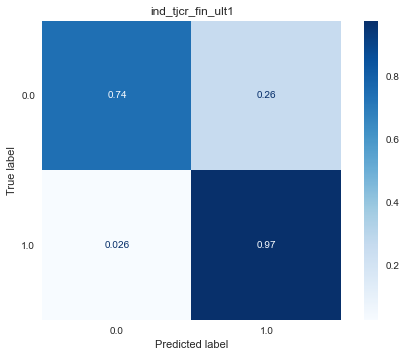

0.9111155265423215
ind_tjcr_fin_ult1
0.9111155265423215
Precision : 0.1287711468840365
recall : 0.9744701625409224
Accuracy  : 0.7525693727971245
Balanced_accuracy : 0.8592108438751447


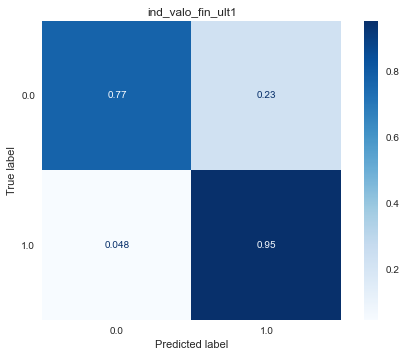

0.9243465321060315
ind_valo_fin_ult1
0.9243465321060315
Precision : 0.09052292368536692
recall : 0.9518342201064127
Accuracy  : 0.7789163811808003
Balanced_accuracy : 0.8633396810318696


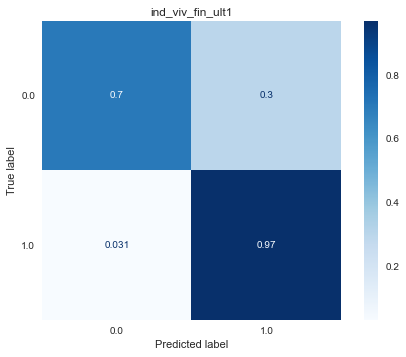

0.9042197010249653
ind_viv_fin_ult1
0.9042197010249653
Precision : 0.01028306217899056
recall : 0.9689084150050693
Accuracy  : 0.7036533244296813
Balanced_accuracy : 0.8358582014971108


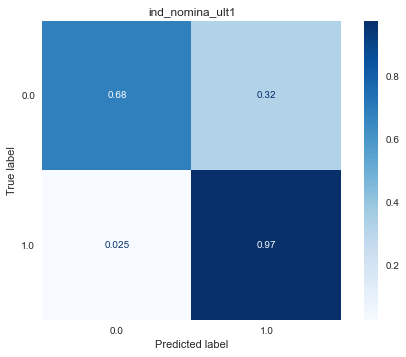

0.8889202125533809
ind_nomina_ult1
0.8889202125533809
Precision : 0.1427956141282094
recall : 0.9745389057939514
Accuracy  : 0.6952653542368751
Balanced_accuracy : 0.8272638365988408


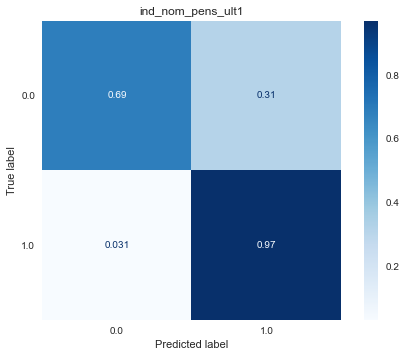

0.8783621643613572
ind_nom_pens_ult1
0.8783621643613572
Precision : 0.15677789619394117
recall : 0.9686837723281865
Accuracy  : 0.7026216030223748
Balanced_accuracy : 0.8276508816740209


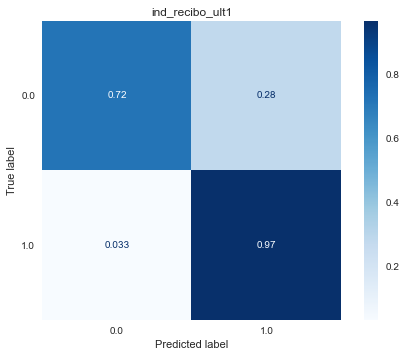

0.8932531168431841
ind_recibo_ult1
0.8932531168431841
Precision : 0.32334668894244273
recall : 0.9672799646174259
Accuracy  : 0.7503545535845609
Balanced_accuracy : 0.8438347763160663


In [154]:
models = {}
model_preds = {}
prediccion_indices = defaultdict(list)
indices = test['ncodpers'].to_numpy()

for product in products:
    
    #Productos con muy baja cantidad de usuarios
    if((product=='ind_ahor_fin_ult1') or (product=='ind_aval_fin_ult1') or (product=='ind_deco_fin_ult1') or (product=='ind_deme_fin_ult1')):
      
       
        ytest = test[product]
        p_train1 = ytest.copy()
        p_train2 = ytest.copy()
        p_train1.loc[:]=0.00001
        
            
            

                             
    else:
        
        #Entrenamiento y predicción para el resto de productos
        ytest = test[product]
    
        ytrain = df_to_ytrain_1[product].values

        clf_model = RandomForestClassifier(max_depth=4, random_state=0, class_weight='balanced', n_jobs=-1)
        clf_model.fit(Xtrain, ytrain)
                
        p_train1 = clf_model.predict_proba(Xtest)[:,1]
        p_train2 = clf_model.predict(Xtest)
        
        disp=plot_confusion_matrix(clf_model, Xtest, ytest,cmap=plt.cm.Blues,
                                 normalize='true')
        disp.ax_.set_title(product)
        plt.grid(False)

        plt.show() 




    for id, p in zip(indices, p_train1):
         prediccion_indices[id].append(p)
        
    print(roc_auc_score(ytest, p_train1))
    print(product)    
    print(roc_auc_score(ytest, p_train1))
    print(f'Precision : {precision_score(ytest,p_train2)}')
    print(f'recall : {recall_score(ytest, p_train2)}')
    print(f'Accuracy  : {accuracy_score(ytest, p_train2)}')
    print(f'Balanced_accuracy : {balanced_accuracy_score(ytest, p_train2)}')   

    


In [62]:
products_cod= ['ncodpers','ind_ahor_fin_ult1','ind_aval_fin_ult1',
 'ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
 'ind_ecue_fin_ult1','ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1',
 'ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
 'ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']

<p>Función para seleccionar los 7 productos que mas se relacionan a cada usuario, evitando seleccionar los que el usuario posee</p>

In [63]:
def product_to_recommend(rec, lista_actual):
    
    lista = lista_actual
    lista_sample = list()
    for i in rec:
        lista_sample.append((lambda x: x[0])(i))
        
    for _,value in enumerate(lista):
        if value in lista_sample:
            lista_sample.remove(value)  
    
    return ' '.join(lista_sample[:7])

<p>Función para organizar los productos</p>

In [64]:
def Sort(sub_li):
    
    return(sorted(sub_li, key = lambda x: x[1],reverse=True)) 

In [65]:
from itertools import islice

producto = {}

for row in data_frames_normal[16][products_cod].values:
    row = list(row)
    id = row.pop(0)   
    producto[id] = [producto for producto, estado in zip(tuple(products), row) if estado > 0]
print('1')

prediciones_ncodpers = dict()
lista_recomendaciones = []

for ncodpers, predictions in islice(prediccion_indices.items(), 0, len(prediccion_indices)):
    
    predicciones_sorted = Sort(list(zip(tuple(products), predictions)))
    prediciones_ncodpers[ncodpers] = predicciones_sorted
print('2')
for ncodpers_sample in sample['ncodpers']:
    
     lista_recomendaciones.append(product_to_recommend(prediciones_ncodpers[ncodpers_sample],producto[ncodpers_sample]))
    



1
2


<p>Adicion de las recomendaciones al formato de sample </p>

In [66]:
sample['added_products'] = lista_recomendaciones

<p>Se guardan los datos .csv para subirlos a kaggle</p>

In [67]:
sample.to_csv('2015_2016_results_forest.csv', index=False)